In [71]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
tf.__version__

'2.0.0'

In [3]:
data = pd.read_csv('Churn_Modelling.csv')

In [4]:
data.shape

(10000, 14)

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
len(data['RowNumber'].unique()), len(data['CustomerId'].unique())

(10000, 10000)

In [7]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [8]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


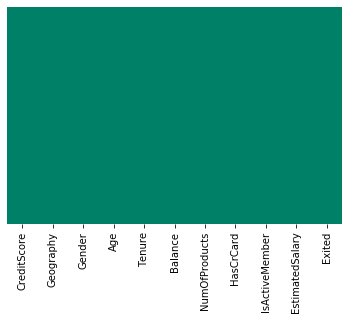

In [9]:
sb.heatmap(data.isna(),
          cbar = False,
          yticklabels = False,
          cmap = 'summer')
plt.show()

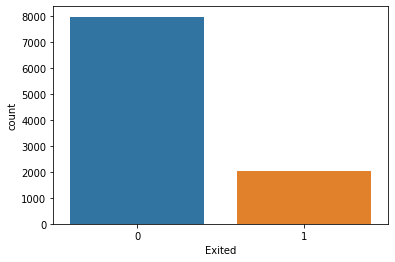

In [10]:
sb.countplot(data['Exited'])
plt.show()

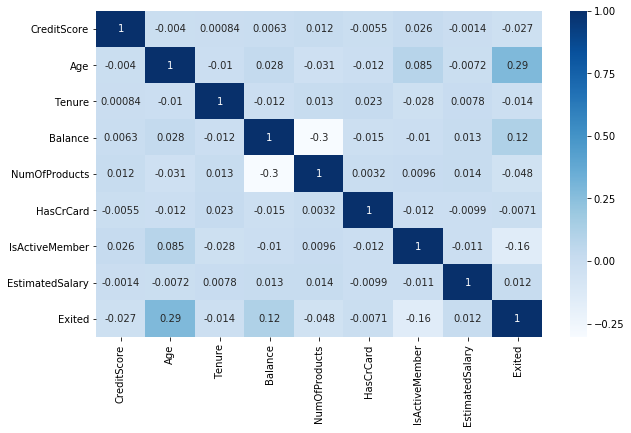

In [11]:
fig, ax = plt.subplots(figsize = (10, 6))

corr = data.corr()
ax = sb.heatmap(corr,
          annot = True,
          cmap = 'Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [12]:
data[data.duplicated()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


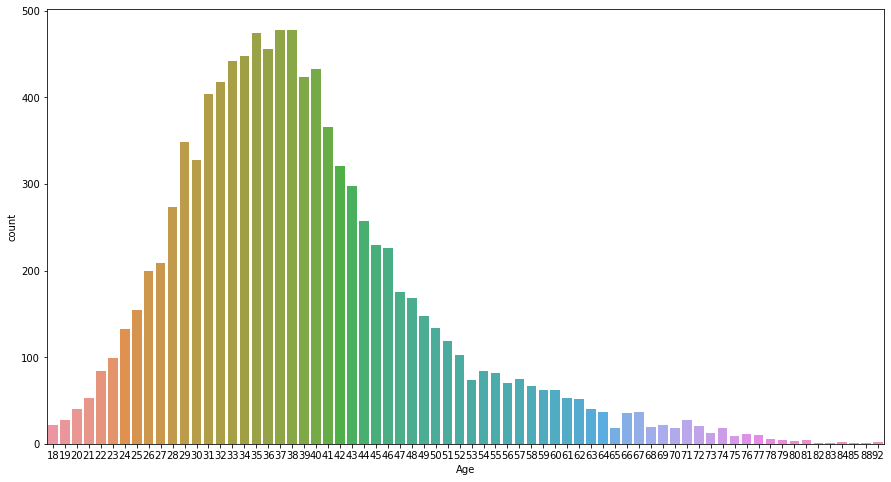

In [13]:
fig, ax = plt.subplots(figsize = (15, 8))

sb.countplot(data['Age'])
plt.show()

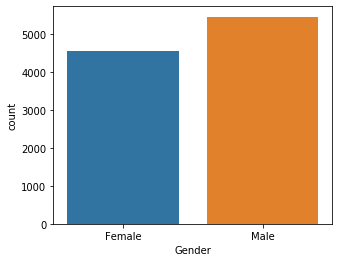

In [14]:
fig, ax = plt.subplots(figsize = (5, 4))

sb.countplot(data['Gender'])
plt.show()

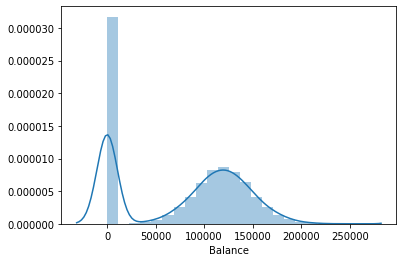

In [15]:
sb.distplot(data['Balance'])
plt.show()

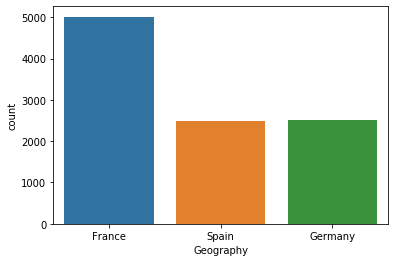

In [16]:
sb.countplot(data['Geography'])
plt.show()

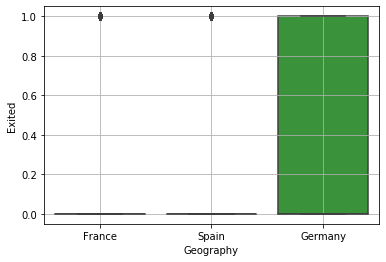

In [17]:
sb.boxplot(x = 'Geography', 
           y = 'Exited', 
           data = data)
plt.grid()
plt.show()

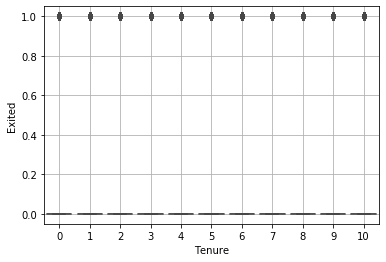

In [18]:
sb.boxplot(x = 'Tenure', 
           y = 'Exited', 
           data = data)
plt.grid()
plt.show()

In [19]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Preprocessing

In [20]:
data['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [21]:
data['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [22]:
sc = StandardScaler()
data.iloc[:, [0,3,5,9]] = sc.fit_transform(data.iloc[:,[0,3,5,9]])

In [23]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,2,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,1,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,8,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,1,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,2,0.785728,1,1,1,-0.365276,0


In [24]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1:].values

In [25]:
X.shape, Y.shape

((10000, 10), (10000, 1))

In [26]:
X[1]

array([-0.4400359548576657, 'Spain', 'Female', 0.1981638321954454, 1,
       0.11735002143511059, 1, 0, 1, 0.21653375188734025], dtype=object)

In [27]:
lb = LabelEncoder()
X[:, 1] = lb.fit_transform(X[:, 1])
X[:, 2] = lb.fit_transform(X[:, 2])

In [28]:
X[1]

array([-0.4400359548576657, 2, 0, 0.1981638321954454, 1,
       0.11735002143511059, 1, 0, 1, 0.21653375188734025], dtype=object)

In [29]:
ohe = OneHotEncoder(categorical_features = [1])
X = ohe.fit_transform(X).toarray()

In [30]:
X[1]

array([ 0.        ,  0.        ,  1.        , -0.44003595,  0.        ,
        0.19816383,  1.        ,  0.11735002,  1.        ,  0.        ,
        1.        ,  0.21653375])

In [31]:
X = X[:, 1:]

In [32]:
X[1]

array([ 0.        ,  1.        , -0.44003595,  0.        ,  0.19816383,
        1.        ,  0.11735002,  1.        ,  0.        ,  1.        ,
        0.21653375])

In [33]:
X.shape

(10000, 11)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [35]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 11), (8000, 1), (2000, 11), (2000, 1))

# Creating Placeholders

To create placeholders we need to disable the eager execution as place holders are not compatible with eager execution

In [36]:
tf.compat.v1.disable_eager_execution()

In [37]:
x = tf.compat.v1.placeholder(dtype = 'float32', shape = [None, 11], name = 'x')
y = tf.compat.v1.placeholder(dtype = 'float32', shape = [None, 1], name = 'y')

In [38]:
x, y

(<tf.Tensor 'x:0' shape=(None, 11) dtype=float32>,
 <tf.Tensor 'y:0' shape=(None, 1) dtype=float32>)

# Initialising weights and bias

In [39]:
sigma = 1
weight_initializer = tf.compat.v1.variance_scaling_initializer(mode = 'fan_avg', distribution = 'uniform', scale = sigma, seed = 42) 
bias_initializer = tf.zeros_initializer()

In [40]:
#Weights and Bias of 1st Layer
w1 = tf.Variable(weight_initializer([x_train.shape[1], 8]))
b1 = tf.Variable(bias_initializer([8]))

#Weights and Bias of 2nd layer
w2 = tf.Variable(weight_initializer([8, 6]))
b2 = tf.Variable(bias_initializer([6]))

#Weights and Bias of 3rd layer
# w3 = tf.Variable(weight_initializer([6, 8]))
# b3 = tf.Variable(bias_initializer([8]))


#Weights and Bias of output layer
wo = tf.Variable(weight_initializer([6, 2]))
bo = tf.Variable(bias_initializer([2]))

init = tf.compat.v1.global_variables_initializer()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [41]:
w1, b1

(<tf.Variable 'Variable:0' shape=(11, 8) dtype=float32>,
 <tf.Variable 'Variable_1:0' shape=(8,) dtype=float32>)

In [42]:
w2, b2

(<tf.Variable 'Variable_2:0' shape=(8, 6) dtype=float32>,
 <tf.Variable 'Variable_3:0' shape=(6,) dtype=float32>)

In [43]:
# w3, b3

In [44]:
wo, bo

(<tf.Variable 'Variable_4:0' shape=(6, 2) dtype=float32>,
 <tf.Variable 'Variable_5:0' shape=(2,) dtype=float32>)

# Forward Propagation

In [45]:
#Layer1 with relu activation function
hidden1 = tf.add(tf.matmul(x, w1), b1)
hidden1 = tf.nn.relu(hidden1)

#layer2 with relu activation function
hidden2 = tf.add(tf.matmul(hidden1, w2), b2)
hidden2 = tf.nn.sigmoid(hidden2)

#layer3
# hidden3 = tf.add(tf.matmul(hidden2, w3), b3)
# hidden3 = tf.nn.relu(hidden3)

#output layer with sigmoid activation function
out = tf.add(tf.matmul(hidden2, wo), bo)
#out = tf.nn.sigmoid(out, name = 'output')

In [46]:
hidden1, hidden2, out

(<tf.Tensor 'Relu:0' shape=(None, 8) dtype=float32>,
 <tf.Tensor 'Sigmoid:0' shape=(None, 6) dtype=float32>,
 <tf.Tensor 'Add_2:0' shape=(None, 2) dtype=float32>)

# Cost Function

In [47]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = out, labels = y))

In [48]:
cost_function

<tf.Tensor 'Mean:0' shape=() dtype=float32>

# Optimizer

In [49]:
learning_rate = 0.0001
opt = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

# launching the graph in Session

In [50]:
sess = tf.compat.v1.Session()
sess.run(init)

In [51]:
sess

# Back Propagation

In [52]:
Training_loss = [ ]
Test_loss = [ ]
pred = [ ]
epochs = 10000
for epoch in range (epochs):
    sess.run(opt, feed_dict = {x: x_train, y: y_train})
    Training_loss.append(sess.run(cost_function, feed_dict = {x: x_train, y: y_train}))
    Test_loss.append(sess.run(cost_function, feed_dict = {x: x_test, y: y_test}))
    
    
    print('Epoch:', epoch, 'Training Cost:', Training_loss[epoch], 'Test Cost:', Test_loss[epoch])

Epoch: 0 Training Cost: 0.28918582 Test Cost: 0.28642833
Epoch: 1 Training Cost: 0.28918427 Test Cost: 0.2864268
Epoch: 2 Training Cost: 0.28918275 Test Cost: 0.28642538
Epoch: 3 Training Cost: 0.28918114 Test Cost: 0.28642395
Epoch: 4 Training Cost: 0.28917956 Test Cost: 0.2864225
Epoch: 5 Training Cost: 0.28917798 Test Cost: 0.286421
Epoch: 6 Training Cost: 0.28917646 Test Cost: 0.28641957
Epoch: 7 Training Cost: 0.28917485 Test Cost: 0.28641802
Epoch: 8 Training Cost: 0.28917336 Test Cost: 0.2864166
Epoch: 9 Training Cost: 0.2891718 Test Cost: 0.28641516
Epoch: 10 Training Cost: 0.28917024 Test Cost: 0.2864137
Epoch: 11 Training Cost: 0.28916872 Test Cost: 0.2864123
Epoch: 12 Training Cost: 0.2891671 Test Cost: 0.28641075
Epoch: 13 Training Cost: 0.2891656 Test Cost: 0.28640926
Epoch: 14 Training Cost: 0.28916404 Test Cost: 0.2864079
Epoch: 15 Training Cost: 0.28916252 Test Cost: 0.28640643
Epoch: 16 Training Cost: 0.2891609 Test Cost: 0.28640494
Epoch: 17 Training Cost: 0.28915933 

Epoch: 168 Training Cost: 0.28893456 Test Cost: 0.28619283
Epoch: 169 Training Cost: 0.28893313 Test Cost: 0.28619152
Epoch: 170 Training Cost: 0.28893173 Test Cost: 0.28619024
Epoch: 171 Training Cost: 0.2889303 Test Cost: 0.28618884
Epoch: 172 Training Cost: 0.2889289 Test Cost: 0.28618753
Epoch: 173 Training Cost: 0.28892744 Test Cost: 0.28618616
Epoch: 174 Training Cost: 0.28892606 Test Cost: 0.28618488
Epoch: 175 Training Cost: 0.28892463 Test Cost: 0.28618354
Epoch: 176 Training Cost: 0.28892314 Test Cost: 0.28618225
Epoch: 177 Training Cost: 0.28892177 Test Cost: 0.28618082
Epoch: 178 Training Cost: 0.28892034 Test Cost: 0.28617954
Epoch: 179 Training Cost: 0.28891894 Test Cost: 0.28617823
Epoch: 180 Training Cost: 0.28891754 Test Cost: 0.2861769
Epoch: 181 Training Cost: 0.2889161 Test Cost: 0.28617555
Epoch: 182 Training Cost: 0.28891462 Test Cost: 0.2861742
Epoch: 183 Training Cost: 0.28891328 Test Cost: 0.2861729
Epoch: 184 Training Cost: 0.28891185 Test Cost: 0.28617162
Epo

Epoch: 321 Training Cost: 0.2887243 Test Cost: 0.28599676
Epoch: 322 Training Cost: 0.28872302 Test Cost: 0.28599554
Epoch: 323 Training Cost: 0.28872174 Test Cost: 0.28599432
Epoch: 324 Training Cost: 0.2887204 Test Cost: 0.2859931
Epoch: 325 Training Cost: 0.28871912 Test Cost: 0.28599188
Epoch: 326 Training Cost: 0.28871778 Test Cost: 0.28599066
Epoch: 327 Training Cost: 0.28871644 Test Cost: 0.28598937
Epoch: 328 Training Cost: 0.28871515 Test Cost: 0.28598818
Epoch: 329 Training Cost: 0.28871387 Test Cost: 0.285987
Epoch: 330 Training Cost: 0.2887126 Test Cost: 0.28598574
Epoch: 331 Training Cost: 0.2887112 Test Cost: 0.28598455
Epoch: 332 Training Cost: 0.28870985 Test Cost: 0.28598332
Epoch: 333 Training Cost: 0.2887085 Test Cost: 0.2859821
Epoch: 334 Training Cost: 0.2887073 Test Cost: 0.28598088
Epoch: 335 Training Cost: 0.288706 Test Cost: 0.2859797
Epoch: 336 Training Cost: 0.28870466 Test Cost: 0.28597847
Epoch: 337 Training Cost: 0.28870335 Test Cost: 0.28597724
Epoch: 338

Epoch: 473 Training Cost: 0.28853148 Test Cost: 0.28581774
Epoch: 474 Training Cost: 0.28853023 Test Cost: 0.28581664
Epoch: 475 Training Cost: 0.28852904 Test Cost: 0.2858155
Epoch: 476 Training Cost: 0.2885278 Test Cost: 0.2858144
Epoch: 477 Training Cost: 0.28852656 Test Cost: 0.28581324
Epoch: 478 Training Cost: 0.2885254 Test Cost: 0.2858121
Epoch: 479 Training Cost: 0.28852418 Test Cost: 0.28581098
Epoch: 480 Training Cost: 0.28852296 Test Cost: 0.28580981
Epoch: 481 Training Cost: 0.2885217 Test Cost: 0.28580874
Epoch: 482 Training Cost: 0.28852051 Test Cost: 0.2858076
Epoch: 483 Training Cost: 0.28851935 Test Cost: 0.2858065
Epoch: 484 Training Cost: 0.28851807 Test Cost: 0.2858054
Epoch: 485 Training Cost: 0.28851685 Test Cost: 0.28580427
Epoch: 486 Training Cost: 0.2885156 Test Cost: 0.28580317
Epoch: 487 Training Cost: 0.28851444 Test Cost: 0.28580204
Epoch: 488 Training Cost: 0.28851327 Test Cost: 0.28580087
Epoch: 489 Training Cost: 0.28851205 Test Cost: 0.28579974
Epoch: 

Epoch: 627 Training Cost: 0.288351 Test Cost: 0.28565112
Epoch: 628 Training Cost: 0.28834987 Test Cost: 0.28565007
Epoch: 629 Training Cost: 0.28834876 Test Cost: 0.2856491
Epoch: 630 Training Cost: 0.28834766 Test Cost: 0.28564808
Epoch: 631 Training Cost: 0.28834647 Test Cost: 0.28564698
Epoch: 632 Training Cost: 0.28834537 Test Cost: 0.285646
Epoch: 633 Training Cost: 0.28834423 Test Cost: 0.2856449
Epoch: 634 Training Cost: 0.28834313 Test Cost: 0.28564394
Epoch: 635 Training Cost: 0.288342 Test Cost: 0.2856429
Epoch: 636 Training Cost: 0.28834087 Test Cost: 0.28564185
Epoch: 637 Training Cost: 0.28833976 Test Cost: 0.28564078
Epoch: 638 Training Cost: 0.28833866 Test Cost: 0.28563976
Epoch: 639 Training Cost: 0.28833753 Test Cost: 0.28563872
Epoch: 640 Training Cost: 0.28833643 Test Cost: 0.2856377
Epoch: 641 Training Cost: 0.28833526 Test Cost: 0.28563672
Epoch: 642 Training Cost: 0.28833416 Test Cost: 0.28563568
Epoch: 643 Training Cost: 0.28833306 Test Cost: 0.28563464
Epoch: 

Epoch: 783 Training Cost: 0.28818226 Test Cost: 0.28549623
Epoch: 784 Training Cost: 0.28818122 Test Cost: 0.28549528
Epoch: 785 Training Cost: 0.28818023 Test Cost: 0.28549433
Epoch: 786 Training Cost: 0.28817916 Test Cost: 0.28549337
Epoch: 787 Training Cost: 0.28817818 Test Cost: 0.28549242
Epoch: 788 Training Cost: 0.2881771 Test Cost: 0.2854915
Epoch: 789 Training Cost: 0.28817606 Test Cost: 0.28549054
Epoch: 790 Training Cost: 0.288175 Test Cost: 0.28548962
Epoch: 791 Training Cost: 0.28817397 Test Cost: 0.28548864
Epoch: 792 Training Cost: 0.28817296 Test Cost: 0.28548768
Epoch: 793 Training Cost: 0.28817195 Test Cost: 0.28548676
Epoch: 794 Training Cost: 0.28817087 Test Cost: 0.28548583
Epoch: 795 Training Cost: 0.28816986 Test Cost: 0.28548485
Epoch: 796 Training Cost: 0.28816885 Test Cost: 0.285484
Epoch: 797 Training Cost: 0.2881678 Test Cost: 0.285483
Epoch: 798 Training Cost: 0.28816676 Test Cost: 0.28548202
Epoch: 799 Training Cost: 0.28816575 Test Cost: 0.28548115
Epoch:

Epoch: 928 Training Cost: 0.28803724 Test Cost: 0.2853638
Epoch: 929 Training Cost: 0.28803626 Test Cost: 0.2853629
Epoch: 930 Training Cost: 0.2880353 Test Cost: 0.28536206
Epoch: 931 Training Cost: 0.28803435 Test Cost: 0.2853612
Epoch: 932 Training Cost: 0.2880334 Test Cost: 0.28536025
Epoch: 933 Training Cost: 0.2880324 Test Cost: 0.28535947
Epoch: 934 Training Cost: 0.28803143 Test Cost: 0.28535855
Epoch: 935 Training Cost: 0.2880305 Test Cost: 0.28535765
Epoch: 936 Training Cost: 0.28802955 Test Cost: 0.28535682
Epoch: 937 Training Cost: 0.28802863 Test Cost: 0.28535596
Epoch: 938 Training Cost: 0.2880276 Test Cost: 0.28535503
Epoch: 939 Training Cost: 0.2880267 Test Cost: 0.2853542
Epoch: 940 Training Cost: 0.28802574 Test Cost: 0.28535333
Epoch: 941 Training Cost: 0.28802478 Test Cost: 0.28535247
Epoch: 942 Training Cost: 0.2880238 Test Cost: 0.28535157
Epoch: 943 Training Cost: 0.28802276 Test Cost: 0.2853507
Epoch: 944 Training Cost: 0.2880219 Test Cost: 0.28534985
Epoch: 945

Epoch: 1068 Training Cost: 0.287907 Test Cost: 0.2852456
Epoch: 1069 Training Cost: 0.2879061 Test Cost: 0.28524476
Epoch: 1070 Training Cost: 0.28790525 Test Cost: 0.28524396
Epoch: 1071 Training Cost: 0.28790435 Test Cost: 0.28524315
Epoch: 1072 Training Cost: 0.2879034 Test Cost: 0.28524235
Epoch: 1073 Training Cost: 0.28790256 Test Cost: 0.28524145
Epoch: 1074 Training Cost: 0.28790164 Test Cost: 0.28524065
Epoch: 1075 Training Cost: 0.28790075 Test Cost: 0.28523988
Epoch: 1076 Training Cost: 0.2878999 Test Cost: 0.28523907
Epoch: 1077 Training Cost: 0.287899 Test Cost: 0.28523824
Epoch: 1078 Training Cost: 0.28789812 Test Cost: 0.28523743
Epoch: 1079 Training Cost: 0.28789723 Test Cost: 0.2852367
Epoch: 1080 Training Cost: 0.2878963 Test Cost: 0.28523582
Epoch: 1081 Training Cost: 0.28789538 Test Cost: 0.28523505
Epoch: 1082 Training Cost: 0.28789452 Test Cost: 0.28523424
Epoch: 1083 Training Cost: 0.28789362 Test Cost: 0.28523344
Epoch: 1084 Training Cost: 0.28789273 Test Cost: 0

Epoch: 1237 Training Cost: 0.28776172 Test Cost: 0.2851144
Epoch: 1238 Training Cost: 0.28776088 Test Cost: 0.28511363
Epoch: 1239 Training Cost: 0.28776005 Test Cost: 0.28511286
Epoch: 1240 Training Cost: 0.28775924 Test Cost: 0.28511217
Epoch: 1241 Training Cost: 0.2877584 Test Cost: 0.28511143
Epoch: 1242 Training Cost: 0.28775764 Test Cost: 0.28511065
Epoch: 1243 Training Cost: 0.2877568 Test Cost: 0.28510997
Epoch: 1244 Training Cost: 0.28775594 Test Cost: 0.2851092
Epoch: 1245 Training Cost: 0.28775516 Test Cost: 0.28510845
Epoch: 1246 Training Cost: 0.28775433 Test Cost: 0.2851077
Epoch: 1247 Training Cost: 0.28775352 Test Cost: 0.285107
Epoch: 1248 Training Cost: 0.2877527 Test Cost: 0.28510624
Epoch: 1249 Training Cost: 0.28775182 Test Cost: 0.28510547
Epoch: 1250 Training Cost: 0.28775102 Test Cost: 0.28510472
Epoch: 1251 Training Cost: 0.28775024 Test Cost: 0.28510407
Epoch: 1252 Training Cost: 0.2877494 Test Cost: 0.2851033
Epoch: 1253 Training Cost: 0.2877486 Test Cost: 0.

Epoch: 1393 Training Cost: 0.28763822 Test Cost: 0.28500354
Epoch: 1394 Training Cost: 0.28763744 Test Cost: 0.28500292
Epoch: 1395 Training Cost: 0.2876367 Test Cost: 0.28500223
Epoch: 1396 Training Cost: 0.28763592 Test Cost: 0.28500158
Epoch: 1397 Training Cost: 0.2876352 Test Cost: 0.28500086
Epoch: 1398 Training Cost: 0.2876344 Test Cost: 0.28500015
Epoch: 1399 Training Cost: 0.2876336 Test Cost: 0.28499952
Epoch: 1400 Training Cost: 0.28763288 Test Cost: 0.28499883
Epoch: 1401 Training Cost: 0.28763214 Test Cost: 0.28499815
Epoch: 1402 Training Cost: 0.28763133 Test Cost: 0.28499743
Epoch: 1403 Training Cost: 0.28763065 Test Cost: 0.2849968
Epoch: 1404 Training Cost: 0.28762984 Test Cost: 0.2849961
Epoch: 1405 Training Cost: 0.2876291 Test Cost: 0.28499544
Epoch: 1406 Training Cost: 0.28762835 Test Cost: 0.28499478
Epoch: 1407 Training Cost: 0.2876276 Test Cost: 0.28499407
Epoch: 1408 Training Cost: 0.2876269 Test Cost: 0.2849934
Epoch: 1409 Training Cost: 0.2876261 Test Cost: 0.

Epoch: 1548 Training Cost: 0.28752467 Test Cost: 0.2849024
Epoch: 1549 Training Cost: 0.28752396 Test Cost: 0.28490177
Epoch: 1550 Training Cost: 0.2875232 Test Cost: 0.2849011
Epoch: 1551 Training Cost: 0.28752255 Test Cost: 0.28490046
Epoch: 1552 Training Cost: 0.28752184 Test Cost: 0.28489983
Epoch: 1553 Training Cost: 0.2875212 Test Cost: 0.2848993
Epoch: 1554 Training Cost: 0.28752047 Test Cost: 0.28489864
Epoch: 1555 Training Cost: 0.28751978 Test Cost: 0.28489798
Epoch: 1556 Training Cost: 0.2875191 Test Cost: 0.28489742
Epoch: 1557 Training Cost: 0.28751832 Test Cost: 0.2848968
Epoch: 1558 Training Cost: 0.28751764 Test Cost: 0.28489617
Epoch: 1559 Training Cost: 0.28751698 Test Cost: 0.2848955
Epoch: 1560 Training Cost: 0.2875163 Test Cost: 0.28489485
Epoch: 1561 Training Cost: 0.28751555 Test Cost: 0.28489426
Epoch: 1562 Training Cost: 0.28751487 Test Cost: 0.2848937
Epoch: 1563 Training Cost: 0.28751415 Test Cost: 0.28489304
Epoch: 1564 Training Cost: 0.28751343 Test Cost: 0

Epoch: 1704 Training Cost: 0.2874189 Test Cost: 0.28480867
Epoch: 1705 Training Cost: 0.28741822 Test Cost: 0.28480804
Epoch: 1706 Training Cost: 0.2874176 Test Cost: 0.28480744
Epoch: 1707 Training Cost: 0.28741693 Test Cost: 0.28480694
Epoch: 1708 Training Cost: 0.28741628 Test Cost: 0.28480634
Epoch: 1709 Training Cost: 0.28741562 Test Cost: 0.28480574
Epoch: 1710 Training Cost: 0.28741503 Test Cost: 0.28480524
Epoch: 1711 Training Cost: 0.28741437 Test Cost: 0.28480458
Epoch: 1712 Training Cost: 0.2874137 Test Cost: 0.28480405
Epoch: 1713 Training Cost: 0.28741303 Test Cost: 0.2848035
Epoch: 1714 Training Cost: 0.2874124 Test Cost: 0.28480285
Epoch: 1715 Training Cost: 0.28741175 Test Cost: 0.28480235
Epoch: 1716 Training Cost: 0.28741112 Test Cost: 0.28480175
Epoch: 1717 Training Cost: 0.28741044 Test Cost: 0.28480124
Epoch: 1718 Training Cost: 0.2874098 Test Cost: 0.28480062
Epoch: 1719 Training Cost: 0.2874092 Test Cost: 0.28480005
Epoch: 1720 Training Cost: 0.2874085 Test Cost:

Epoch: 1859 Training Cost: 0.28732163 Test Cost: 0.28472295
Epoch: 1860 Training Cost: 0.28732097 Test Cost: 0.28472248
Epoch: 1861 Training Cost: 0.28732038 Test Cost: 0.28472194
Epoch: 1862 Training Cost: 0.28731972 Test Cost: 0.28472137
Epoch: 1863 Training Cost: 0.2873192 Test Cost: 0.28472096
Epoch: 1864 Training Cost: 0.28731862 Test Cost: 0.28472033
Epoch: 1865 Training Cost: 0.28731793 Test Cost: 0.28471982
Epoch: 1866 Training Cost: 0.2873174 Test Cost: 0.2847193
Epoch: 1867 Training Cost: 0.28731674 Test Cost: 0.28471875
Epoch: 1868 Training Cost: 0.28731617 Test Cost: 0.28471822
Epoch: 1869 Training Cost: 0.28731558 Test Cost: 0.2847177
Epoch: 1870 Training Cost: 0.287315 Test Cost: 0.2847172
Epoch: 1871 Training Cost: 0.28731436 Test Cost: 0.28471664
Epoch: 1872 Training Cost: 0.2873138 Test Cost: 0.28471613
Epoch: 1873 Training Cost: 0.2873132 Test Cost: 0.2847156
Epoch: 1874 Training Cost: 0.28731257 Test Cost: 0.2847151
Epoch: 1875 Training Cost: 0.28731194 Test Cost: 0.

Epoch: 2015 Training Cost: 0.28723097 Test Cost: 0.28464377
Epoch: 2016 Training Cost: 0.28723034 Test Cost: 0.28464332
Epoch: 2017 Training Cost: 0.28722984 Test Cost: 0.28464282
Epoch: 2018 Training Cost: 0.28722924 Test Cost: 0.2846423
Epoch: 2019 Training Cost: 0.2872287 Test Cost: 0.2846418
Epoch: 2020 Training Cost: 0.28722814 Test Cost: 0.28464136
Epoch: 2021 Training Cost: 0.28722754 Test Cost: 0.28464088
Epoch: 2022 Training Cost: 0.28722697 Test Cost: 0.2846403
Epoch: 2023 Training Cost: 0.28722644 Test Cost: 0.28463987
Epoch: 2024 Training Cost: 0.2872259 Test Cost: 0.2846394
Epoch: 2025 Training Cost: 0.28722525 Test Cost: 0.2846389
Epoch: 2026 Training Cost: 0.28722474 Test Cost: 0.28463843
Epoch: 2027 Training Cost: 0.2872242 Test Cost: 0.28463796
Epoch: 2028 Training Cost: 0.28722364 Test Cost: 0.28463742
Epoch: 2029 Training Cost: 0.28722313 Test Cost: 0.28463697
Epoch: 2030 Training Cost: 0.2872226 Test Cost: 0.28463647
Epoch: 2031 Training Cost: 0.287222 Test Cost: 0.

Epoch: 2180 Training Cost: 0.28714225 Test Cost: 0.28456682
Epoch: 2181 Training Cost: 0.2871417 Test Cost: 0.28456643
Epoch: 2182 Training Cost: 0.2871412 Test Cost: 0.28456593
Epoch: 2183 Training Cost: 0.2871407 Test Cost: 0.28456554
Epoch: 2184 Training Cost: 0.28714013 Test Cost: 0.28456512
Epoch: 2185 Training Cost: 0.28713965 Test Cost: 0.28456467
Epoch: 2186 Training Cost: 0.28713912 Test Cost: 0.2845642
Epoch: 2187 Training Cost: 0.2871386 Test Cost: 0.28456375
Epoch: 2188 Training Cost: 0.28713816 Test Cost: 0.2845633
Epoch: 2189 Training Cost: 0.28713763 Test Cost: 0.28456283
Epoch: 2190 Training Cost: 0.28713712 Test Cost: 0.2845624
Epoch: 2191 Training Cost: 0.28713658 Test Cost: 0.284562
Epoch: 2192 Training Cost: 0.2871361 Test Cost: 0.2845615
Epoch: 2193 Training Cost: 0.28713554 Test Cost: 0.28456113
Epoch: 2194 Training Cost: 0.287135 Test Cost: 0.28456068
Epoch: 2195 Training Cost: 0.2871345 Test Cost: 0.28456017
Epoch: 2196 Training Cost: 0.287134 Test Cost: 0.28455

Epoch: 2347 Training Cost: 0.2870594 Test Cost: 0.28449562
Epoch: 2348 Training Cost: 0.2870589 Test Cost: 0.28449523
Epoch: 2349 Training Cost: 0.2870584 Test Cost: 0.28449482
Epoch: 2350 Training Cost: 0.287058 Test Cost: 0.28449443
Epoch: 2351 Training Cost: 0.2870575 Test Cost: 0.28449398
Epoch: 2352 Training Cost: 0.28705704 Test Cost: 0.2844936
Epoch: 2353 Training Cost: 0.28705654 Test Cost: 0.28449318
Epoch: 2354 Training Cost: 0.28705606 Test Cost: 0.28449276
Epoch: 2355 Training Cost: 0.28705555 Test Cost: 0.2844923
Epoch: 2356 Training Cost: 0.28705508 Test Cost: 0.284492
Epoch: 2357 Training Cost: 0.28705463 Test Cost: 0.28449157
Epoch: 2358 Training Cost: 0.28705415 Test Cost: 0.28449115
Epoch: 2359 Training Cost: 0.28705364 Test Cost: 0.2844908
Epoch: 2360 Training Cost: 0.28705323 Test Cost: 0.28449032
Epoch: 2361 Training Cost: 0.28705272 Test Cost: 0.28448993
Epoch: 2362 Training Cost: 0.2870523 Test Cost: 0.28448957
Epoch: 2363 Training Cost: 0.2870518 Test Cost: 0.28

Epoch: 2512 Training Cost: 0.28698382 Test Cost: 0.28443125
Epoch: 2513 Training Cost: 0.2869834 Test Cost: 0.28443086
Epoch: 2514 Training Cost: 0.28698292 Test Cost: 0.28443047
Epoch: 2515 Training Cost: 0.28698254 Test Cost: 0.28443006
Epoch: 2516 Training Cost: 0.2869821 Test Cost: 0.28442973
Epoch: 2517 Training Cost: 0.28698164 Test Cost: 0.2844293
Epoch: 2518 Training Cost: 0.28698125 Test Cost: 0.28442895
Epoch: 2519 Training Cost: 0.28698075 Test Cost: 0.2844286
Epoch: 2520 Training Cost: 0.28698036 Test Cost: 0.28442818
Epoch: 2521 Training Cost: 0.28697985 Test Cost: 0.28442782
Epoch: 2522 Training Cost: 0.28697944 Test Cost: 0.2844275
Epoch: 2523 Training Cost: 0.286979 Test Cost: 0.28442708
Epoch: 2524 Training Cost: 0.28697857 Test Cost: 0.28442672
Epoch: 2525 Training Cost: 0.28697816 Test Cost: 0.28442633
Epoch: 2526 Training Cost: 0.28697768 Test Cost: 0.28442597
Epoch: 2527 Training Cost: 0.28697723 Test Cost: 0.2844256
Epoch: 2528 Training Cost: 0.28697684 Test Cost:

Epoch: 2668 Training Cost: 0.28691772 Test Cost: 0.28437528
Epoch: 2669 Training Cost: 0.2869173 Test Cost: 0.2843749
Epoch: 2670 Training Cost: 0.2869169 Test Cost: 0.2843746
Epoch: 2671 Training Cost: 0.2869165 Test Cost: 0.2843742
Epoch: 2672 Training Cost: 0.2869161 Test Cost: 0.28437385
Epoch: 2673 Training Cost: 0.28691572 Test Cost: 0.28437352
Epoch: 2674 Training Cost: 0.28691527 Test Cost: 0.28437322
Epoch: 2675 Training Cost: 0.28691483 Test Cost: 0.28437287
Epoch: 2676 Training Cost: 0.28691447 Test Cost: 0.28437245
Epoch: 2677 Training Cost: 0.28691405 Test Cost: 0.2843721
Epoch: 2678 Training Cost: 0.28691363 Test Cost: 0.28437176
Epoch: 2679 Training Cost: 0.28691328 Test Cost: 0.2843715
Epoch: 2680 Training Cost: 0.28691283 Test Cost: 0.28437117
Epoch: 2681 Training Cost: 0.28691238 Test Cost: 0.28437078
Epoch: 2682 Training Cost: 0.286912 Test Cost: 0.28437042
Epoch: 2683 Training Cost: 0.28691155 Test Cost: 0.2843701
Epoch: 2684 Training Cost: 0.2869112 Test Cost: 0.28

Epoch: 2823 Training Cost: 0.28685665 Test Cost: 0.28432405
Epoch: 2824 Training Cost: 0.28685626 Test Cost: 0.2843237
Epoch: 2825 Training Cost: 0.2868559 Test Cost: 0.28432336
Epoch: 2826 Training Cost: 0.2868555 Test Cost: 0.28432307
Epoch: 2827 Training Cost: 0.2868551 Test Cost: 0.28432277
Epoch: 2828 Training Cost: 0.2868548 Test Cost: 0.28432244
Epoch: 2829 Training Cost: 0.28685436 Test Cost: 0.2843221
Epoch: 2830 Training Cost: 0.286854 Test Cost: 0.28432184
Epoch: 2831 Training Cost: 0.28685358 Test Cost: 0.2843215
Epoch: 2832 Training Cost: 0.28685322 Test Cost: 0.28432116
Epoch: 2833 Training Cost: 0.28685284 Test Cost: 0.28432083
Epoch: 2834 Training Cost: 0.28685248 Test Cost: 0.28432056
Epoch: 2835 Training Cost: 0.2868521 Test Cost: 0.28432027
Epoch: 2836 Training Cost: 0.28685167 Test Cost: 0.28431994
Epoch: 2837 Training Cost: 0.28685135 Test Cost: 0.28431958
Epoch: 2838 Training Cost: 0.28685093 Test Cost: 0.28431928
Epoch: 2839 Training Cost: 0.28685057 Test Cost: 0

Epoch: 2979 Training Cost: 0.28679955 Test Cost: 0.28427643
Epoch: 2980 Training Cost: 0.28679916 Test Cost: 0.2842762
Epoch: 2981 Training Cost: 0.2867988 Test Cost: 0.2842759
Epoch: 2982 Training Cost: 0.28679842 Test Cost: 0.28427556
Epoch: 2983 Training Cost: 0.28679815 Test Cost: 0.28427532
Epoch: 2984 Training Cost: 0.2867978 Test Cost: 0.284275
Epoch: 2985 Training Cost: 0.28679743 Test Cost: 0.28427467
Epoch: 2986 Training Cost: 0.2867971 Test Cost: 0.2842744
Epoch: 2987 Training Cost: 0.28679675 Test Cost: 0.2842741
Epoch: 2988 Training Cost: 0.2867964 Test Cost: 0.2842738
Epoch: 2989 Training Cost: 0.28679603 Test Cost: 0.28427356
Epoch: 2990 Training Cost: 0.28679565 Test Cost: 0.2842732
Epoch: 2991 Training Cost: 0.28679532 Test Cost: 0.28427294
Epoch: 2992 Training Cost: 0.28679496 Test Cost: 0.2842727
Epoch: 2993 Training Cost: 0.2867946 Test Cost: 0.28427237
Epoch: 2994 Training Cost: 0.28679425 Test Cost: 0.28427207
Epoch: 2995 Training Cost: 0.28679395 Test Cost: 0.284

Epoch: 3133 Training Cost: 0.28674713 Test Cost: 0.28423318
Epoch: 3134 Training Cost: 0.28674677 Test Cost: 0.2842329
Epoch: 3135 Training Cost: 0.2867464 Test Cost: 0.28423262
Epoch: 3136 Training Cost: 0.2867461 Test Cost: 0.28423235
Epoch: 3137 Training Cost: 0.2867458 Test Cost: 0.28423208
Epoch: 3138 Training Cost: 0.2867455 Test Cost: 0.2842318
Epoch: 3139 Training Cost: 0.28674516 Test Cost: 0.2842315
Epoch: 3140 Training Cost: 0.28674477 Test Cost: 0.28423128
Epoch: 3141 Training Cost: 0.2867445 Test Cost: 0.28423095
Epoch: 3142 Training Cost: 0.28674415 Test Cost: 0.2842307
Epoch: 3143 Training Cost: 0.28674385 Test Cost: 0.28423044
Epoch: 3144 Training Cost: 0.28674352 Test Cost: 0.28423023
Epoch: 3145 Training Cost: 0.28674316 Test Cost: 0.28422987
Epoch: 3146 Training Cost: 0.28674287 Test Cost: 0.28422964
Epoch: 3147 Training Cost: 0.28674248 Test Cost: 0.28422937
Epoch: 3148 Training Cost: 0.28674218 Test Cost: 0.28422913
Epoch: 3149 Training Cost: 0.28674188 Test Cost: 

Epoch: 3291 Training Cost: 0.28669697 Test Cost: 0.28419217
Epoch: 3292 Training Cost: 0.28669667 Test Cost: 0.28419194
Epoch: 3293 Training Cost: 0.28669646 Test Cost: 0.28419167
Epoch: 3294 Training Cost: 0.2866961 Test Cost: 0.28419143
Epoch: 3295 Training Cost: 0.28669587 Test Cost: 0.28419116
Epoch: 3296 Training Cost: 0.28669557 Test Cost: 0.28419092
Epoch: 3297 Training Cost: 0.28669524 Test Cost: 0.28419068
Epoch: 3298 Training Cost: 0.2866949 Test Cost: 0.28419042
Epoch: 3299 Training Cost: 0.28669462 Test Cost: 0.28419018
Epoch: 3300 Training Cost: 0.2866943 Test Cost: 0.2841899
Epoch: 3301 Training Cost: 0.28669396 Test Cost: 0.2841897
Epoch: 3302 Training Cost: 0.28669366 Test Cost: 0.28418946
Epoch: 3303 Training Cost: 0.28669336 Test Cost: 0.28418913
Epoch: 3304 Training Cost: 0.28669307 Test Cost: 0.28418893
Epoch: 3305 Training Cost: 0.28669274 Test Cost: 0.28418872
Epoch: 3306 Training Cost: 0.28669244 Test Cost: 0.28418845
Epoch: 3307 Training Cost: 0.28669214 Test Co

Epoch: 3449 Training Cost: 0.28665042 Test Cost: 0.28415436
Epoch: 3450 Training Cost: 0.28665015 Test Cost: 0.28415415
Epoch: 3451 Training Cost: 0.28664988 Test Cost: 0.28415397
Epoch: 3452 Training Cost: 0.28664958 Test Cost: 0.2841537
Epoch: 3453 Training Cost: 0.28664935 Test Cost: 0.28415343
Epoch: 3454 Training Cost: 0.28664902 Test Cost: 0.28415322
Epoch: 3455 Training Cost: 0.28664875 Test Cost: 0.284153
Epoch: 3456 Training Cost: 0.2866484 Test Cost: 0.28415278
Epoch: 3457 Training Cost: 0.28664812 Test Cost: 0.2841526
Epoch: 3458 Training Cost: 0.28664783 Test Cost: 0.2841523
Epoch: 3459 Training Cost: 0.2866476 Test Cost: 0.2841521
Epoch: 3460 Training Cost: 0.2866473 Test Cost: 0.28415185
Epoch: 3461 Training Cost: 0.28664696 Test Cost: 0.2841516
Epoch: 3462 Training Cost: 0.28664672 Test Cost: 0.2841514
Epoch: 3463 Training Cost: 0.28664646 Test Cost: 0.28415126
Epoch: 3464 Training Cost: 0.2866462 Test Cost: 0.28415093
Epoch: 3465 Training Cost: 0.28664586 Test Cost: 0.2

Epoch: 3600 Training Cost: 0.28660893 Test Cost: 0.28412104
Epoch: 3601 Training Cost: 0.28660867 Test Cost: 0.28412086
Epoch: 3602 Training Cost: 0.2866084 Test Cost: 0.28412065
Epoch: 3603 Training Cost: 0.28660813 Test Cost: 0.2841204
Epoch: 3604 Training Cost: 0.2866079 Test Cost: 0.28412017
Epoch: 3605 Training Cost: 0.28660762 Test Cost: 0.28411993
Epoch: 3606 Training Cost: 0.28660735 Test Cost: 0.28411976
Epoch: 3607 Training Cost: 0.28660712 Test Cost: 0.28411958
Epoch: 3608 Training Cost: 0.28660688 Test Cost: 0.28411937
Epoch: 3609 Training Cost: 0.28660658 Test Cost: 0.28411916
Epoch: 3610 Training Cost: 0.2866063 Test Cost: 0.28411892
Epoch: 3611 Training Cost: 0.286606 Test Cost: 0.2841187
Epoch: 3612 Training Cost: 0.28660575 Test Cost: 0.2841185
Epoch: 3613 Training Cost: 0.28660554 Test Cost: 0.28411832
Epoch: 3614 Training Cost: 0.28660527 Test Cost: 0.28411812
Epoch: 3615 Training Cost: 0.286605 Test Cost: 0.28411785
Epoch: 3616 Training Cost: 0.28660473 Test Cost: 0

Epoch: 3753 Training Cost: 0.28656974 Test Cost: 0.28408977
Epoch: 3754 Training Cost: 0.28656945 Test Cost: 0.28408957
Epoch: 3755 Training Cost: 0.2865692 Test Cost: 0.28408936
Epoch: 3756 Training Cost: 0.28656897 Test Cost: 0.28408924
Epoch: 3757 Training Cost: 0.28656876 Test Cost: 0.284089
Epoch: 3758 Training Cost: 0.2865685 Test Cost: 0.28408882
Epoch: 3759 Training Cost: 0.2865682 Test Cost: 0.2840886
Epoch: 3760 Training Cost: 0.286568 Test Cost: 0.2840884
Epoch: 3761 Training Cost: 0.28656775 Test Cost: 0.28408825
Epoch: 3762 Training Cost: 0.2865675 Test Cost: 0.28408802
Epoch: 3763 Training Cost: 0.28656727 Test Cost: 0.28408778
Epoch: 3764 Training Cost: 0.28656697 Test Cost: 0.28408766
Epoch: 3765 Training Cost: 0.28656673 Test Cost: 0.28408742
Epoch: 3766 Training Cost: 0.28656656 Test Cost: 0.2840872
Epoch: 3767 Training Cost: 0.2865663 Test Cost: 0.28408706
Epoch: 3768 Training Cost: 0.28656605 Test Cost: 0.28408685
Epoch: 3769 Training Cost: 0.2865658 Test Cost: 0.28

Epoch: 3905 Training Cost: 0.28653327 Test Cost: 0.28406093
Epoch: 3906 Training Cost: 0.28653306 Test Cost: 0.2840607
Epoch: 3907 Training Cost: 0.28653285 Test Cost: 0.28406054
Epoch: 3908 Training Cost: 0.28653258 Test Cost: 0.28406033
Epoch: 3909 Training Cost: 0.28653234 Test Cost: 0.28406018
Epoch: 3910 Training Cost: 0.28653213 Test Cost: 0.28406003
Epoch: 3911 Training Cost: 0.2865319 Test Cost: 0.28405985
Epoch: 3912 Training Cost: 0.28653166 Test Cost: 0.28405964
Epoch: 3913 Training Cost: 0.28653142 Test Cost: 0.28405944
Epoch: 3914 Training Cost: 0.2865312 Test Cost: 0.28405926
Epoch: 3915 Training Cost: 0.286531 Test Cost: 0.28405908
Epoch: 3916 Training Cost: 0.28653076 Test Cost: 0.2840589
Epoch: 3917 Training Cost: 0.28653055 Test Cost: 0.28405878
Epoch: 3918 Training Cost: 0.28653035 Test Cost: 0.2840586
Epoch: 3919 Training Cost: 0.28653005 Test Cost: 0.2840584
Epoch: 3920 Training Cost: 0.28652984 Test Cost: 0.28405815
Epoch: 3921 Training Cost: 0.2865296 Test Cost: 

Epoch: 4061 Training Cost: 0.28649828 Test Cost: 0.2840334
Epoch: 4062 Training Cost: 0.2864981 Test Cost: 0.2840332
Epoch: 4063 Training Cost: 0.28649786 Test Cost: 0.2840331
Epoch: 4064 Training Cost: 0.28649762 Test Cost: 0.2840329
Epoch: 4065 Training Cost: 0.2864974 Test Cost: 0.28403267
Epoch: 4066 Training Cost: 0.2864972 Test Cost: 0.28403255
Epoch: 4067 Training Cost: 0.28649694 Test Cost: 0.28403234
Epoch: 4068 Training Cost: 0.28649673 Test Cost: 0.28403217
Epoch: 4069 Training Cost: 0.28649652 Test Cost: 0.28403202
Epoch: 4070 Training Cost: 0.28649634 Test Cost: 0.28403184
Epoch: 4071 Training Cost: 0.2864961 Test Cost: 0.2840317
Epoch: 4072 Training Cost: 0.28649592 Test Cost: 0.28403157
Epoch: 4073 Training Cost: 0.28649572 Test Cost: 0.28403136
Epoch: 4074 Training Cost: 0.28649548 Test Cost: 0.2840312
Epoch: 4075 Training Cost: 0.28649527 Test Cost: 0.28403103
Epoch: 4076 Training Cost: 0.2864951 Test Cost: 0.28403082
Epoch: 4077 Training Cost: 0.28649482 Test Cost: 0.

Epoch: 4231 Training Cost: 0.28646272 Test Cost: 0.28400564
Epoch: 4232 Training Cost: 0.28646252 Test Cost: 0.2840055
Epoch: 4233 Training Cost: 0.28646234 Test Cost: 0.28400534
Epoch: 4234 Training Cost: 0.2864621 Test Cost: 0.28400525
Epoch: 4235 Training Cost: 0.2864619 Test Cost: 0.28400508
Epoch: 4236 Training Cost: 0.2864617 Test Cost: 0.28400496
Epoch: 4237 Training Cost: 0.28646153 Test Cost: 0.28400475
Epoch: 4238 Training Cost: 0.2864613 Test Cost: 0.28400457
Epoch: 4239 Training Cost: 0.2864611 Test Cost: 0.28400445
Epoch: 4240 Training Cost: 0.28646088 Test Cost: 0.28400424
Epoch: 4241 Training Cost: 0.2864607 Test Cost: 0.28400412
Epoch: 4242 Training Cost: 0.28646052 Test Cost: 0.28400397
Epoch: 4243 Training Cost: 0.28646034 Test Cost: 0.28400385
Epoch: 4244 Training Cost: 0.28646013 Test Cost: 0.2840037
Epoch: 4245 Training Cost: 0.2864599 Test Cost: 0.2840035
Epoch: 4246 Training Cost: 0.28645968 Test Cost: 0.28400335
Epoch: 4247 Training Cost: 0.2864595 Test Cost: 0.

Epoch: 4372 Training Cost: 0.28643516 Test Cost: 0.2839844
Epoch: 4373 Training Cost: 0.28643495 Test Cost: 0.2839843
Epoch: 4374 Training Cost: 0.28643477 Test Cost: 0.28398412
Epoch: 4375 Training Cost: 0.28643456 Test Cost: 0.283984
Epoch: 4376 Training Cost: 0.28643435 Test Cost: 0.28398383
Epoch: 4377 Training Cost: 0.2864342 Test Cost: 0.2839837
Epoch: 4378 Training Cost: 0.28643396 Test Cost: 0.2839836
Epoch: 4379 Training Cost: 0.2864338 Test Cost: 0.2839834
Epoch: 4380 Training Cost: 0.28643364 Test Cost: 0.2839833
Epoch: 4381 Training Cost: 0.28643346 Test Cost: 0.28398314
Epoch: 4382 Training Cost: 0.28643322 Test Cost: 0.28398296
Epoch: 4383 Training Cost: 0.28643307 Test Cost: 0.28398278
Epoch: 4384 Training Cost: 0.2864329 Test Cost: 0.28398266
Epoch: 4385 Training Cost: 0.2864327 Test Cost: 0.28398252
Epoch: 4386 Training Cost: 0.2864325 Test Cost: 0.2839824
Epoch: 4387 Training Cost: 0.28643236 Test Cost: 0.28398225
Epoch: 4388 Training Cost: 0.28643212 Test Cost: 0.283

Epoch: 4522 Training Cost: 0.2864076 Test Cost: 0.28396335
Epoch: 4523 Training Cost: 0.28640735 Test Cost: 0.2839632
Epoch: 4524 Training Cost: 0.28640717 Test Cost: 0.28396305
Epoch: 4525 Training Cost: 0.286407 Test Cost: 0.2839629
Epoch: 4526 Training Cost: 0.28640682 Test Cost: 0.28396282
Epoch: 4527 Training Cost: 0.28640667 Test Cost: 0.28396267
Epoch: 4528 Training Cost: 0.28640646 Test Cost: 0.28396255
Epoch: 4529 Training Cost: 0.2864063 Test Cost: 0.2839624
Epoch: 4530 Training Cost: 0.28640613 Test Cost: 0.28396222
Epoch: 4531 Training Cost: 0.286406 Test Cost: 0.28396207
Epoch: 4532 Training Cost: 0.2864058 Test Cost: 0.28396198
Epoch: 4533 Training Cost: 0.28640565 Test Cost: 0.28396183
Epoch: 4534 Training Cost: 0.2864054 Test Cost: 0.28396174
Epoch: 4535 Training Cost: 0.28640527 Test Cost: 0.28396156
Epoch: 4536 Training Cost: 0.28640506 Test Cost: 0.28396142
Epoch: 4537 Training Cost: 0.2864049 Test Cost: 0.2839613
Epoch: 4538 Training Cost: 0.28640473 Test Cost: 0.28

Epoch: 4676 Training Cost: 0.286381 Test Cost: 0.28394318
Epoch: 4677 Training Cost: 0.2863808 Test Cost: 0.2839431
Epoch: 4678 Training Cost: 0.28638068 Test Cost: 0.28394294
Epoch: 4679 Training Cost: 0.28638053 Test Cost: 0.28394282
Epoch: 4680 Training Cost: 0.28638035 Test Cost: 0.2839427
Epoch: 4681 Training Cost: 0.28638017 Test Cost: 0.28394258
Epoch: 4682 Training Cost: 0.28637996 Test Cost: 0.2839424
Epoch: 4683 Training Cost: 0.2863798 Test Cost: 0.2839423
Epoch: 4684 Training Cost: 0.28637964 Test Cost: 0.2839422
Epoch: 4685 Training Cost: 0.28637946 Test Cost: 0.28394207
Epoch: 4686 Training Cost: 0.28637934 Test Cost: 0.28394195
Epoch: 4687 Training Cost: 0.28637916 Test Cost: 0.28394184
Epoch: 4688 Training Cost: 0.286379 Test Cost: 0.28394172
Epoch: 4689 Training Cost: 0.28637883 Test Cost: 0.28394154
Epoch: 4690 Training Cost: 0.28637865 Test Cost: 0.28394142
Epoch: 4691 Training Cost: 0.28637847 Test Cost: 0.2839413
Epoch: 4692 Training Cost: 0.2863783 Test Cost: 0.28

Epoch: 4826 Training Cost: 0.28635663 Test Cost: 0.283925
Epoch: 4827 Training Cost: 0.2863565 Test Cost: 0.28392494
Epoch: 4828 Training Cost: 0.28635636 Test Cost: 0.28392482
Epoch: 4829 Training Cost: 0.2863562 Test Cost: 0.28392467
Epoch: 4830 Training Cost: 0.28635606 Test Cost: 0.2839245
Epoch: 4831 Training Cost: 0.28635588 Test Cost: 0.28392437
Epoch: 4832 Training Cost: 0.2863557 Test Cost: 0.28392425
Epoch: 4833 Training Cost: 0.28635558 Test Cost: 0.2839242
Epoch: 4834 Training Cost: 0.2863554 Test Cost: 0.28392407
Epoch: 4835 Training Cost: 0.2863553 Test Cost: 0.28392395
Epoch: 4836 Training Cost: 0.2863551 Test Cost: 0.28392383
Epoch: 4837 Training Cost: 0.28635493 Test Cost: 0.28392372
Epoch: 4838 Training Cost: 0.2863548 Test Cost: 0.2839236
Epoch: 4839 Training Cost: 0.28635463 Test Cost: 0.28392345
Epoch: 4840 Training Cost: 0.28635445 Test Cost: 0.28392336
Epoch: 4841 Training Cost: 0.28635427 Test Cost: 0.28392324
Epoch: 4842 Training Cost: 0.28635412 Test Cost: 0.2

Epoch: 4972 Training Cost: 0.28633428 Test Cost: 0.28390843
Epoch: 4973 Training Cost: 0.28633416 Test Cost: 0.2839083
Epoch: 4974 Training Cost: 0.28633404 Test Cost: 0.2839082
Epoch: 4975 Training Cost: 0.28633386 Test Cost: 0.28390807
Epoch: 4976 Training Cost: 0.2863337 Test Cost: 0.28390795
Epoch: 4977 Training Cost: 0.28633356 Test Cost: 0.28390786
Epoch: 4978 Training Cost: 0.2863334 Test Cost: 0.2839077
Epoch: 4979 Training Cost: 0.2863333 Test Cost: 0.2839076
Epoch: 4980 Training Cost: 0.28633314 Test Cost: 0.2839075
Epoch: 4981 Training Cost: 0.28633296 Test Cost: 0.2839074
Epoch: 4982 Training Cost: 0.28633282 Test Cost: 0.2839073
Epoch: 4983 Training Cost: 0.2863327 Test Cost: 0.28390718
Epoch: 4984 Training Cost: 0.28633255 Test Cost: 0.28390706
Epoch: 4985 Training Cost: 0.28633237 Test Cost: 0.283907
Epoch: 4986 Training Cost: 0.28633222 Test Cost: 0.28390685
Epoch: 4987 Training Cost: 0.28633207 Test Cost: 0.28390676
Epoch: 4988 Training Cost: 0.28633192 Test Cost: 0.28

Epoch: 5120 Training Cost: 0.28631288 Test Cost: 0.28389266
Epoch: 5121 Training Cost: 0.28631276 Test Cost: 0.28389257
Epoch: 5122 Training Cost: 0.2863126 Test Cost: 0.28389245
Epoch: 5123 Training Cost: 0.2863125 Test Cost: 0.28389236
Epoch: 5124 Training Cost: 0.2863123 Test Cost: 0.28389227
Epoch: 5125 Training Cost: 0.28631213 Test Cost: 0.28389215
Epoch: 5126 Training Cost: 0.28631204 Test Cost: 0.28389204
Epoch: 5127 Training Cost: 0.2863119 Test Cost: 0.28389195
Epoch: 5128 Training Cost: 0.28631178 Test Cost: 0.28389186
Epoch: 5129 Training Cost: 0.28631166 Test Cost: 0.28389177
Epoch: 5130 Training Cost: 0.28631145 Test Cost: 0.28389165
Epoch: 5131 Training Cost: 0.2863113 Test Cost: 0.28389153
Epoch: 5132 Training Cost: 0.28631115 Test Cost: 0.2838914
Epoch: 5133 Training Cost: 0.28631103 Test Cost: 0.28389132
Epoch: 5134 Training Cost: 0.28631088 Test Cost: 0.28389117
Epoch: 5135 Training Cost: 0.28631073 Test Cost: 0.28389108
Epoch: 5136 Training Cost: 0.2863106 Test Cost

Epoch: 5268 Training Cost: 0.28629264 Test Cost: 0.2838779
Epoch: 5269 Training Cost: 0.28629252 Test Cost: 0.28387782
Epoch: 5270 Training Cost: 0.28629237 Test Cost: 0.28387764
Epoch: 5271 Training Cost: 0.28629223 Test Cost: 0.28387758
Epoch: 5272 Training Cost: 0.2862921 Test Cost: 0.28387752
Epoch: 5273 Training Cost: 0.28629196 Test Cost: 0.28387737
Epoch: 5274 Training Cost: 0.28629187 Test Cost: 0.2838773
Epoch: 5275 Training Cost: 0.2862917 Test Cost: 0.2838772
Epoch: 5276 Training Cost: 0.28629157 Test Cost: 0.28387713
Epoch: 5277 Training Cost: 0.2862914 Test Cost: 0.28387704
Epoch: 5278 Training Cost: 0.28629127 Test Cost: 0.28387696
Epoch: 5279 Training Cost: 0.28629115 Test Cost: 0.28387684
Epoch: 5280 Training Cost: 0.286291 Test Cost: 0.28387678
Epoch: 5281 Training Cost: 0.28629088 Test Cost: 0.2838766
Epoch: 5282 Training Cost: 0.28629076 Test Cost: 0.28387654
Epoch: 5283 Training Cost: 0.28629065 Test Cost: 0.28387645
Epoch: 5284 Training Cost: 0.2862905 Test Cost: 0

Epoch: 5416 Training Cost: 0.28627357 Test Cost: 0.28386414
Epoch: 5417 Training Cost: 0.28627342 Test Cost: 0.28386402
Epoch: 5418 Training Cost: 0.28627327 Test Cost: 0.2838639
Epoch: 5419 Training Cost: 0.28627315 Test Cost: 0.28386384
Epoch: 5420 Training Cost: 0.286273 Test Cost: 0.28386372
Epoch: 5421 Training Cost: 0.28627288 Test Cost: 0.28386357
Epoch: 5422 Training Cost: 0.2862728 Test Cost: 0.2838635
Epoch: 5423 Training Cost: 0.28627264 Test Cost: 0.28386343
Epoch: 5424 Training Cost: 0.28627256 Test Cost: 0.28386337
Epoch: 5425 Training Cost: 0.2862724 Test Cost: 0.28386325
Epoch: 5426 Training Cost: 0.2862723 Test Cost: 0.2838632
Epoch: 5427 Training Cost: 0.28627217 Test Cost: 0.2838631
Epoch: 5428 Training Cost: 0.28627202 Test Cost: 0.28386304
Epoch: 5429 Training Cost: 0.28627187 Test Cost: 0.28386292
Epoch: 5430 Training Cost: 0.2862718 Test Cost: 0.2838628
Epoch: 5431 Training Cost: 0.2862717 Test Cost: 0.2838627
Epoch: 5432 Training Cost: 0.28627154 Test Cost: 0.28

Epoch: 5566 Training Cost: 0.28625518 Test Cost: 0.28385082
Epoch: 5567 Training Cost: 0.28625506 Test Cost: 0.28385076
Epoch: 5568 Training Cost: 0.28625494 Test Cost: 0.28385067
Epoch: 5569 Training Cost: 0.28625485 Test Cost: 0.2838506
Epoch: 5570 Training Cost: 0.28625473 Test Cost: 0.2838505
Epoch: 5571 Training Cost: 0.28625458 Test Cost: 0.28385043
Epoch: 5572 Training Cost: 0.28625447 Test Cost: 0.2838504
Epoch: 5573 Training Cost: 0.28625435 Test Cost: 0.28385028
Epoch: 5574 Training Cost: 0.28625417 Test Cost: 0.28385022
Epoch: 5575 Training Cost: 0.28625408 Test Cost: 0.28385016
Epoch: 5576 Training Cost: 0.28625396 Test Cost: 0.28385
Epoch: 5577 Training Cost: 0.28625384 Test Cost: 0.28384995
Epoch: 5578 Training Cost: 0.28625375 Test Cost: 0.28384987
Epoch: 5579 Training Cost: 0.28625366 Test Cost: 0.28384978
Epoch: 5580 Training Cost: 0.28625354 Test Cost: 0.28384966
Epoch: 5581 Training Cost: 0.28625342 Test Cost: 0.28384954
Epoch: 5582 Training Cost: 0.2862533 Test Cost

Epoch: 5727 Training Cost: 0.28623652 Test Cost: 0.2838376
Epoch: 5728 Training Cost: 0.28623638 Test Cost: 0.2838375
Epoch: 5729 Training Cost: 0.2862363 Test Cost: 0.2838374
Epoch: 5730 Training Cost: 0.28623617 Test Cost: 0.28383735
Epoch: 5731 Training Cost: 0.28623608 Test Cost: 0.28383726
Epoch: 5732 Training Cost: 0.28623596 Test Cost: 0.28383717
Epoch: 5733 Training Cost: 0.2862359 Test Cost: 0.2838371
Epoch: 5734 Training Cost: 0.28623578 Test Cost: 0.28383702
Epoch: 5735 Training Cost: 0.28623566 Test Cost: 0.28383687
Epoch: 5736 Training Cost: 0.28623557 Test Cost: 0.28383684
Epoch: 5737 Training Cost: 0.28623542 Test Cost: 0.28383672
Epoch: 5738 Training Cost: 0.28623536 Test Cost: 0.2838367
Epoch: 5739 Training Cost: 0.2862352 Test Cost: 0.2838366
Epoch: 5740 Training Cost: 0.28623506 Test Cost: 0.28383648
Epoch: 5741 Training Cost: 0.286235 Test Cost: 0.28383645
Epoch: 5742 Training Cost: 0.28623486 Test Cost: 0.28383636
Epoch: 5743 Training Cost: 0.28623474 Test Cost: 0.

Epoch: 5870 Training Cost: 0.28622082 Test Cost: 0.28382644
Epoch: 5871 Training Cost: 0.2862207 Test Cost: 0.28382635
Epoch: 5872 Training Cost: 0.28622064 Test Cost: 0.28382626
Epoch: 5873 Training Cost: 0.28622052 Test Cost: 0.2838262
Epoch: 5874 Training Cost: 0.2862204 Test Cost: 0.2838261
Epoch: 5875 Training Cost: 0.28622028 Test Cost: 0.28382605
Epoch: 5876 Training Cost: 0.28622016 Test Cost: 0.28382602
Epoch: 5877 Training Cost: 0.28622004 Test Cost: 0.28382593
Epoch: 5878 Training Cost: 0.28621998 Test Cost: 0.28382587
Epoch: 5879 Training Cost: 0.2862198 Test Cost: 0.28382578
Epoch: 5880 Training Cost: 0.2862197 Test Cost: 0.28382573
Epoch: 5881 Training Cost: 0.2862196 Test Cost: 0.28382564
Epoch: 5882 Training Cost: 0.28621954 Test Cost: 0.28382558
Epoch: 5883 Training Cost: 0.28621942 Test Cost: 0.2838255
Epoch: 5884 Training Cost: 0.28621933 Test Cost: 0.28382543
Epoch: 5885 Training Cost: 0.28621918 Test Cost: 0.2838253
Epoch: 5886 Training Cost: 0.28621912 Test Cost: 

Epoch: 6019 Training Cost: 0.28620523 Test Cost: 0.2838155
Epoch: 6020 Training Cost: 0.28620514 Test Cost: 0.2838154
Epoch: 6021 Training Cost: 0.28620502 Test Cost: 0.2838153
Epoch: 6022 Training Cost: 0.2862049 Test Cost: 0.28381523
Epoch: 6023 Training Cost: 0.28620484 Test Cost: 0.28381518
Epoch: 6024 Training Cost: 0.28620473 Test Cost: 0.28381512
Epoch: 6025 Training Cost: 0.28620458 Test Cost: 0.28381503
Epoch: 6026 Training Cost: 0.28620452 Test Cost: 0.283815
Epoch: 6027 Training Cost: 0.28620443 Test Cost: 0.28381494
Epoch: 6028 Training Cost: 0.28620434 Test Cost: 0.28381488
Epoch: 6029 Training Cost: 0.28620422 Test Cost: 0.2838148
Epoch: 6030 Training Cost: 0.2862041 Test Cost: 0.2838147
Epoch: 6031 Training Cost: 0.28620404 Test Cost: 0.28381464
Epoch: 6032 Training Cost: 0.28620398 Test Cost: 0.28381458
Epoch: 6033 Training Cost: 0.28620386 Test Cost: 0.28381452
Epoch: 6034 Training Cost: 0.2862038 Test Cost: 0.28381446
Epoch: 6035 Training Cost: 0.2862037 Test Cost: 0.

Epoch: 6158 Training Cost: 0.28619143 Test Cost: 0.28380582
Epoch: 6159 Training Cost: 0.28619134 Test Cost: 0.2838058
Epoch: 6160 Training Cost: 0.28619125 Test Cost: 0.2838057
Epoch: 6161 Training Cost: 0.28619117 Test Cost: 0.28380564
Epoch: 6162 Training Cost: 0.28619108 Test Cost: 0.28380555
Epoch: 6163 Training Cost: 0.28619093 Test Cost: 0.2838055
Epoch: 6164 Training Cost: 0.28619087 Test Cost: 0.2838054
Epoch: 6165 Training Cost: 0.28619075 Test Cost: 0.28380537
Epoch: 6166 Training Cost: 0.2861907 Test Cost: 0.2838053
Epoch: 6167 Training Cost: 0.2861906 Test Cost: 0.28380525
Epoch: 6168 Training Cost: 0.28619048 Test Cost: 0.28380516
Epoch: 6169 Training Cost: 0.28619036 Test Cost: 0.2838051
Epoch: 6170 Training Cost: 0.28619024 Test Cost: 0.283805
Epoch: 6171 Training Cost: 0.28619012 Test Cost: 0.28380492
Epoch: 6172 Training Cost: 0.28619003 Test Cost: 0.28380492
Epoch: 6173 Training Cost: 0.28618994 Test Cost: 0.28380483
Epoch: 6174 Training Cost: 0.28618982 Test Cost: 0

Epoch: 6314 Training Cost: 0.2861766 Test Cost: 0.28379554
Epoch: 6315 Training Cost: 0.28617653 Test Cost: 0.28379548
Epoch: 6316 Training Cost: 0.28617644 Test Cost: 0.28379542
Epoch: 6317 Training Cost: 0.28617635 Test Cost: 0.28379536
Epoch: 6318 Training Cost: 0.2861763 Test Cost: 0.2837953
Epoch: 6319 Training Cost: 0.2861762 Test Cost: 0.28379527
Epoch: 6320 Training Cost: 0.2861761 Test Cost: 0.28379512
Epoch: 6321 Training Cost: 0.28617603 Test Cost: 0.2837951
Epoch: 6322 Training Cost: 0.28617594 Test Cost: 0.283795
Epoch: 6323 Training Cost: 0.28617585 Test Cost: 0.2837949
Epoch: 6324 Training Cost: 0.2861758 Test Cost: 0.28379485
Epoch: 6325 Training Cost: 0.28617567 Test Cost: 0.28379482
Epoch: 6326 Training Cost: 0.28617558 Test Cost: 0.28379476
Epoch: 6327 Training Cost: 0.2861755 Test Cost: 0.28379467
Epoch: 6328 Training Cost: 0.28617534 Test Cost: 0.2837946
Epoch: 6329 Training Cost: 0.28617528 Test Cost: 0.28379455
Epoch: 6330 Training Cost: 0.2861752 Test Cost: 0.28

Epoch: 6470 Training Cost: 0.28616259 Test Cost: 0.28378576
Epoch: 6471 Training Cost: 0.28616253 Test Cost: 0.2837857
Epoch: 6472 Training Cost: 0.28616244 Test Cost: 0.28378564
Epoch: 6473 Training Cost: 0.28616235 Test Cost: 0.2837856
Epoch: 6474 Training Cost: 0.28616226 Test Cost: 0.28378552
Epoch: 6475 Training Cost: 0.28616217 Test Cost: 0.28378546
Epoch: 6476 Training Cost: 0.28616205 Test Cost: 0.2837854
Epoch: 6477 Training Cost: 0.286162 Test Cost: 0.28378534
Epoch: 6478 Training Cost: 0.28616187 Test Cost: 0.28378528
Epoch: 6479 Training Cost: 0.28616178 Test Cost: 0.28378525
Epoch: 6480 Training Cost: 0.2861617 Test Cost: 0.2837852
Epoch: 6481 Training Cost: 0.28616163 Test Cost: 0.28378513
Epoch: 6482 Training Cost: 0.2861615 Test Cost: 0.28378505
Epoch: 6483 Training Cost: 0.28616145 Test Cost: 0.283785
Epoch: 6484 Training Cost: 0.2861613 Test Cost: 0.28378493
Epoch: 6485 Training Cost: 0.28616124 Test Cost: 0.2837849
Epoch: 6486 Training Cost: 0.28616115 Test Cost: 0.2

Epoch: 6632 Training Cost: 0.2861486 Test Cost: 0.28377613
Epoch: 6633 Training Cost: 0.28614855 Test Cost: 0.28377607
Epoch: 6634 Training Cost: 0.28614843 Test Cost: 0.283776
Epoch: 6635 Training Cost: 0.28614837 Test Cost: 0.2837759
Epoch: 6636 Training Cost: 0.2861483 Test Cost: 0.28377587
Epoch: 6637 Training Cost: 0.28614822 Test Cost: 0.28377578
Epoch: 6638 Training Cost: 0.28614813 Test Cost: 0.28377572
Epoch: 6639 Training Cost: 0.286148 Test Cost: 0.28377566
Epoch: 6640 Training Cost: 0.28614795 Test Cost: 0.28377563
Epoch: 6641 Training Cost: 0.28614783 Test Cost: 0.28377557
Epoch: 6642 Training Cost: 0.2861478 Test Cost: 0.2837755
Epoch: 6643 Training Cost: 0.2861477 Test Cost: 0.28377545
Epoch: 6644 Training Cost: 0.28614765 Test Cost: 0.2837754
Epoch: 6645 Training Cost: 0.28614753 Test Cost: 0.28377533
Epoch: 6646 Training Cost: 0.28614748 Test Cost: 0.28377524
Epoch: 6647 Training Cost: 0.28614733 Test Cost: 0.28377524
Epoch: 6648 Training Cost: 0.28614727 Test Cost: 0.

Epoch: 6804 Training Cost: 0.28613445 Test Cost: 0.2837663
Epoch: 6805 Training Cost: 0.28613436 Test Cost: 0.28376624
Epoch: 6806 Training Cost: 0.28613427 Test Cost: 0.28376618
Epoch: 6807 Training Cost: 0.2861342 Test Cost: 0.28376618
Epoch: 6808 Training Cost: 0.2861341 Test Cost: 0.28376612
Epoch: 6809 Training Cost: 0.28613397 Test Cost: 0.28376606
Epoch: 6810 Training Cost: 0.28613392 Test Cost: 0.283766
Epoch: 6811 Training Cost: 0.2861338 Test Cost: 0.28376597
Epoch: 6812 Training Cost: 0.28613374 Test Cost: 0.2837659
Epoch: 6813 Training Cost: 0.2861337 Test Cost: 0.28376588
Epoch: 6814 Training Cost: 0.28613365 Test Cost: 0.28376576
Epoch: 6815 Training Cost: 0.28613353 Test Cost: 0.28376567
Epoch: 6816 Training Cost: 0.2861334 Test Cost: 0.28376567
Epoch: 6817 Training Cost: 0.28613338 Test Cost: 0.2837656
Epoch: 6818 Training Cost: 0.28613332 Test Cost: 0.28376555
Epoch: 6819 Training Cost: 0.28613326 Test Cost: 0.28376547
Epoch: 6820 Training Cost: 0.28613317 Test Cost: 0

Epoch: 6969 Training Cost: 0.28612143 Test Cost: 0.28375733
Epoch: 6970 Training Cost: 0.2861214 Test Cost: 0.28375727
Epoch: 6971 Training Cost: 0.28612134 Test Cost: 0.28375724
Epoch: 6972 Training Cost: 0.28612125 Test Cost: 0.2837572
Epoch: 6973 Training Cost: 0.28612116 Test Cost: 0.28375715
Epoch: 6974 Training Cost: 0.2861211 Test Cost: 0.2837571
Epoch: 6975 Training Cost: 0.28612098 Test Cost: 0.28375697
Epoch: 6976 Training Cost: 0.28612092 Test Cost: 0.28375694
Epoch: 6977 Training Cost: 0.28612086 Test Cost: 0.2837569
Epoch: 6978 Training Cost: 0.2861208 Test Cost: 0.2837568
Epoch: 6979 Training Cost: 0.28612065 Test Cost: 0.28375676
Epoch: 6980 Training Cost: 0.2861206 Test Cost: 0.2837567
Epoch: 6981 Training Cost: 0.28612053 Test Cost: 0.28375667
Epoch: 6982 Training Cost: 0.28612047 Test Cost: 0.2837566
Epoch: 6983 Training Cost: 0.28612038 Test Cost: 0.28375655
Epoch: 6984 Training Cost: 0.2861203 Test Cost: 0.28375652
Epoch: 6985 Training Cost: 0.28612024 Test Cost: 0.

Epoch: 7116 Training Cost: 0.28611034 Test Cost: 0.28374964
Epoch: 7117 Training Cost: 0.28611022 Test Cost: 0.28374958
Epoch: 7118 Training Cost: 0.2861102 Test Cost: 0.28374955
Epoch: 7119 Training Cost: 0.2861101 Test Cost: 0.2837495
Epoch: 7120 Training Cost: 0.28610998 Test Cost: 0.28374946
Epoch: 7121 Training Cost: 0.28610992 Test Cost: 0.2837494
Epoch: 7122 Training Cost: 0.28610986 Test Cost: 0.28374937
Epoch: 7123 Training Cost: 0.2861098 Test Cost: 0.2837493
Epoch: 7124 Training Cost: 0.28610975 Test Cost: 0.28374922
Epoch: 7125 Training Cost: 0.28610963 Test Cost: 0.2837492
Epoch: 7126 Training Cost: 0.2861096 Test Cost: 0.28374913
Epoch: 7127 Training Cost: 0.2861095 Test Cost: 0.28374907
Epoch: 7128 Training Cost: 0.28610942 Test Cost: 0.28374904
Epoch: 7129 Training Cost: 0.2861094 Test Cost: 0.28374895
Epoch: 7130 Training Cost: 0.28610933 Test Cost: 0.2837489
Epoch: 7131 Training Cost: 0.28610918 Test Cost: 0.28374887
Epoch: 7132 Training Cost: 0.28610912 Test Cost: 0.

Epoch: 7275 Training Cost: 0.28609878 Test Cost: 0.28374168
Epoch: 7276 Training Cost: 0.2860987 Test Cost: 0.28374165
Epoch: 7277 Training Cost: 0.28609866 Test Cost: 0.28374156
Epoch: 7278 Training Cost: 0.2860986 Test Cost: 0.2837415
Epoch: 7279 Training Cost: 0.2860985 Test Cost: 0.28374144
Epoch: 7280 Training Cost: 0.28609845 Test Cost: 0.28374138
Epoch: 7281 Training Cost: 0.2860984 Test Cost: 0.28374135
Epoch: 7282 Training Cost: 0.2860983 Test Cost: 0.28374133
Epoch: 7283 Training Cost: 0.28609824 Test Cost: 0.2837413
Epoch: 7284 Training Cost: 0.28609815 Test Cost: 0.28374124
Epoch: 7285 Training Cost: 0.2860981 Test Cost: 0.2837412
Epoch: 7286 Training Cost: 0.28609803 Test Cost: 0.28374112
Epoch: 7287 Training Cost: 0.28609794 Test Cost: 0.28374103
Epoch: 7288 Training Cost: 0.28609788 Test Cost: 0.28374097
Epoch: 7289 Training Cost: 0.28609776 Test Cost: 0.28374097
Epoch: 7290 Training Cost: 0.2860977 Test Cost: 0.2837409
Epoch: 7291 Training Cost: 0.28609765 Test Cost: 0.

Epoch: 7448 Training Cost: 0.28608674 Test Cost: 0.28373328
Epoch: 7449 Training Cost: 0.28608665 Test Cost: 0.28373325
Epoch: 7450 Training Cost: 0.28608656 Test Cost: 0.28373322
Epoch: 7451 Training Cost: 0.2860865 Test Cost: 0.28373316
Epoch: 7452 Training Cost: 0.28608644 Test Cost: 0.28373313
Epoch: 7453 Training Cost: 0.28608635 Test Cost: 0.28373307
Epoch: 7454 Training Cost: 0.2860863 Test Cost: 0.28373304
Epoch: 7455 Training Cost: 0.28608623 Test Cost: 0.28373298
Epoch: 7456 Training Cost: 0.28608614 Test Cost: 0.28373295
Epoch: 7457 Training Cost: 0.28608608 Test Cost: 0.2837329
Epoch: 7458 Training Cost: 0.286086 Test Cost: 0.28373286
Epoch: 7459 Training Cost: 0.28608593 Test Cost: 0.2837328
Epoch: 7460 Training Cost: 0.28608587 Test Cost: 0.2837327
Epoch: 7461 Training Cost: 0.2860858 Test Cost: 0.28373265
Epoch: 7462 Training Cost: 0.28608572 Test Cost: 0.28373265
Epoch: 7463 Training Cost: 0.2860857 Test Cost: 0.2837326
Epoch: 7464 Training Cost: 0.2860856 Test Cost: 0.

Epoch: 7602 Training Cost: 0.28607634 Test Cost: 0.28372613
Epoch: 7603 Training Cost: 0.28607628 Test Cost: 0.283726
Epoch: 7604 Training Cost: 0.28607616 Test Cost: 0.28372595
Epoch: 7605 Training Cost: 0.2860761 Test Cost: 0.2837259
Epoch: 7606 Training Cost: 0.28607604 Test Cost: 0.2837259
Epoch: 7607 Training Cost: 0.28607598 Test Cost: 0.28372583
Epoch: 7608 Training Cost: 0.28607592 Test Cost: 0.2837258
Epoch: 7609 Training Cost: 0.28607583 Test Cost: 0.28372574
Epoch: 7610 Training Cost: 0.28607577 Test Cost: 0.2837257
Epoch: 7611 Training Cost: 0.2860757 Test Cost: 0.28372565
Epoch: 7612 Training Cost: 0.28607565 Test Cost: 0.28372562
Epoch: 7613 Training Cost: 0.2860756 Test Cost: 0.28372556
Epoch: 7614 Training Cost: 0.28607553 Test Cost: 0.28372553
Epoch: 7615 Training Cost: 0.2860755 Test Cost: 0.28372547
Epoch: 7616 Training Cost: 0.28607544 Test Cost: 0.28372544
Epoch: 7617 Training Cost: 0.28607532 Test Cost: 0.28372535
Epoch: 7618 Training Cost: 0.2860753 Test Cost: 0.

Epoch: 7766 Training Cost: 0.2860656 Test Cost: 0.28371862
Epoch: 7767 Training Cost: 0.28606552 Test Cost: 0.28371856
Epoch: 7768 Training Cost: 0.28606546 Test Cost: 0.28371853
Epoch: 7769 Training Cost: 0.28606543 Test Cost: 0.28371844
Epoch: 7770 Training Cost: 0.28606534 Test Cost: 0.28371844
Epoch: 7771 Training Cost: 0.28606528 Test Cost: 0.28371838
Epoch: 7772 Training Cost: 0.28606525 Test Cost: 0.28371832
Epoch: 7773 Training Cost: 0.28606513 Test Cost: 0.28371832
Epoch: 7774 Training Cost: 0.28606507 Test Cost: 0.28371826
Epoch: 7775 Training Cost: 0.286065 Test Cost: 0.2837182
Epoch: 7776 Training Cost: 0.28606495 Test Cost: 0.28371814
Epoch: 7777 Training Cost: 0.2860649 Test Cost: 0.28371808
Epoch: 7778 Training Cost: 0.28606483 Test Cost: 0.28371805
Epoch: 7779 Training Cost: 0.28606474 Test Cost: 0.28371802
Epoch: 7780 Training Cost: 0.28606468 Test Cost: 0.28371796
Epoch: 7781 Training Cost: 0.28606462 Test Cost: 0.28371793
Epoch: 7782 Training Cost: 0.28606457 Test Co

Epoch: 7935 Training Cost: 0.286055 Test Cost: 0.28371117
Epoch: 7936 Training Cost: 0.2860549 Test Cost: 0.28371114
Epoch: 7937 Training Cost: 0.28605485 Test Cost: 0.28371105
Epoch: 7938 Training Cost: 0.28605476 Test Cost: 0.283711
Epoch: 7939 Training Cost: 0.2860547 Test Cost: 0.28371093
Epoch: 7940 Training Cost: 0.28605464 Test Cost: 0.2837109
Epoch: 7941 Training Cost: 0.28605458 Test Cost: 0.28371087
Epoch: 7942 Training Cost: 0.28605452 Test Cost: 0.2837108
Epoch: 7943 Training Cost: 0.28605446 Test Cost: 0.28371075
Epoch: 7944 Training Cost: 0.2860544 Test Cost: 0.28371075
Epoch: 7945 Training Cost: 0.2860543 Test Cost: 0.28371072
Epoch: 7946 Training Cost: 0.28605425 Test Cost: 0.28371063
Epoch: 7947 Training Cost: 0.28605425 Test Cost: 0.2837106
Epoch: 7948 Training Cost: 0.28605413 Test Cost: 0.28371057
Epoch: 7949 Training Cost: 0.2860541 Test Cost: 0.28371057
Epoch: 7950 Training Cost: 0.28605402 Test Cost: 0.2837105
Epoch: 7951 Training Cost: 0.28605402 Test Cost: 0.28

Epoch: 8105 Training Cost: 0.28604457 Test Cost: 0.28370374
Epoch: 8106 Training Cost: 0.2860445 Test Cost: 0.28370374
Epoch: 8107 Training Cost: 0.28604442 Test Cost: 0.28370368
Epoch: 8108 Training Cost: 0.28604436 Test Cost: 0.28370363
Epoch: 8109 Training Cost: 0.2860443 Test Cost: 0.2837036
Epoch: 8110 Training Cost: 0.28604424 Test Cost: 0.28370357
Epoch: 8111 Training Cost: 0.28604418 Test Cost: 0.2837035
Epoch: 8112 Training Cost: 0.28604412 Test Cost: 0.28370342
Epoch: 8113 Training Cost: 0.28604406 Test Cost: 0.2837034
Epoch: 8114 Training Cost: 0.286044 Test Cost: 0.28370336
Epoch: 8115 Training Cost: 0.2860439 Test Cost: 0.28370336
Epoch: 8116 Training Cost: 0.28604388 Test Cost: 0.2837033
Epoch: 8117 Training Cost: 0.2860438 Test Cost: 0.28370324
Epoch: 8118 Training Cost: 0.28604373 Test Cost: 0.28370318
Epoch: 8119 Training Cost: 0.2860437 Test Cost: 0.28370315
Epoch: 8120 Training Cost: 0.28604364 Test Cost: 0.28370312
Epoch: 8121 Training Cost: 0.28604358 Test Cost: 0.

Epoch: 8276 Training Cost: 0.28603444 Test Cost: 0.2836965
Epoch: 8277 Training Cost: 0.2860344 Test Cost: 0.28369647
Epoch: 8278 Training Cost: 0.28603432 Test Cost: 0.28369644
Epoch: 8279 Training Cost: 0.28603423 Test Cost: 0.2836964
Epoch: 8280 Training Cost: 0.28603417 Test Cost: 0.28369635
Epoch: 8281 Training Cost: 0.28603414 Test Cost: 0.2836963
Epoch: 8282 Training Cost: 0.28603405 Test Cost: 0.28369623
Epoch: 8283 Training Cost: 0.28603402 Test Cost: 0.28369623
Epoch: 8284 Training Cost: 0.28603396 Test Cost: 0.28369617
Epoch: 8285 Training Cost: 0.2860339 Test Cost: 0.28369614
Epoch: 8286 Training Cost: 0.2860338 Test Cost: 0.28369612
Epoch: 8287 Training Cost: 0.28603378 Test Cost: 0.2836961
Epoch: 8288 Training Cost: 0.2860337 Test Cost: 0.28369606
Epoch: 8289 Training Cost: 0.28603366 Test Cost: 0.28369597
Epoch: 8290 Training Cost: 0.28603363 Test Cost: 0.28369594
Epoch: 8291 Training Cost: 0.28603354 Test Cost: 0.2836959
Epoch: 8292 Training Cost: 0.2860335 Test Cost: 0

Epoch: 8445 Training Cost: 0.2860247 Test Cost: 0.28368953
Epoch: 8446 Training Cost: 0.28602466 Test Cost: 0.28368947
Epoch: 8447 Training Cost: 0.2860246 Test Cost: 0.28368944
Epoch: 8448 Training Cost: 0.28602448 Test Cost: 0.28368935
Epoch: 8449 Training Cost: 0.28602448 Test Cost: 0.28368932
Epoch: 8450 Training Cost: 0.28602442 Test Cost: 0.28368926
Epoch: 8451 Training Cost: 0.28602436 Test Cost: 0.28368923
Epoch: 8452 Training Cost: 0.2860243 Test Cost: 0.28368917
Epoch: 8453 Training Cost: 0.28602424 Test Cost: 0.28368914
Epoch: 8454 Training Cost: 0.28602418 Test Cost: 0.28368914
Epoch: 8455 Training Cost: 0.28602412 Test Cost: 0.28368908
Epoch: 8456 Training Cost: 0.28602403 Test Cost: 0.28368905
Epoch: 8457 Training Cost: 0.286024 Test Cost: 0.283689
Epoch: 8458 Training Cost: 0.2860239 Test Cost: 0.28368896
Epoch: 8459 Training Cost: 0.28602389 Test Cost: 0.2836889
Epoch: 8460 Training Cost: 0.2860238 Test Cost: 0.2836889
Epoch: 8461 Training Cost: 0.2860238 Test Cost: 0.2

Epoch: 8617 Training Cost: 0.2860151 Test Cost: 0.28368255
Epoch: 8618 Training Cost: 0.286015 Test Cost: 0.2836825
Epoch: 8619 Training Cost: 0.28601494 Test Cost: 0.28368244
Epoch: 8620 Training Cost: 0.28601494 Test Cost: 0.2836824
Epoch: 8621 Training Cost: 0.28601488 Test Cost: 0.28368238
Epoch: 8622 Training Cost: 0.28601483 Test Cost: 0.28368232
Epoch: 8623 Training Cost: 0.28601477 Test Cost: 0.28368232
Epoch: 8624 Training Cost: 0.28601474 Test Cost: 0.28368226
Epoch: 8625 Training Cost: 0.28601468 Test Cost: 0.28368223
Epoch: 8626 Training Cost: 0.28601462 Test Cost: 0.2836822
Epoch: 8627 Training Cost: 0.2860146 Test Cost: 0.28368214
Epoch: 8628 Training Cost: 0.28601453 Test Cost: 0.28368208
Epoch: 8629 Training Cost: 0.28601447 Test Cost: 0.28368205
Epoch: 8630 Training Cost: 0.2860144 Test Cost: 0.283682
Epoch: 8631 Training Cost: 0.28601435 Test Cost: 0.28368196
Epoch: 8632 Training Cost: 0.2860143 Test Cost: 0.28368193
Epoch: 8633 Training Cost: 0.2860142 Test Cost: 0.2

Epoch: 8782 Training Cost: 0.28600603 Test Cost: 0.28367594
Epoch: 8783 Training Cost: 0.286006 Test Cost: 0.2836759
Epoch: 8784 Training Cost: 0.28600597 Test Cost: 0.2836759
Epoch: 8785 Training Cost: 0.2860059 Test Cost: 0.28367585
Epoch: 8786 Training Cost: 0.28600585 Test Cost: 0.28367582
Epoch: 8787 Training Cost: 0.2860058 Test Cost: 0.28367576
Epoch: 8788 Training Cost: 0.28600574 Test Cost: 0.28367573
Epoch: 8789 Training Cost: 0.28600568 Test Cost: 0.28367567
Epoch: 8790 Training Cost: 0.28600565 Test Cost: 0.2836756
Epoch: 8791 Training Cost: 0.28600556 Test Cost: 0.28367558
Epoch: 8792 Training Cost: 0.28600553 Test Cost: 0.28367555
Epoch: 8793 Training Cost: 0.2860055 Test Cost: 0.28367555
Epoch: 8794 Training Cost: 0.28600544 Test Cost: 0.2836755
Epoch: 8795 Training Cost: 0.28600538 Test Cost: 0.2836754
Epoch: 8796 Training Cost: 0.28600532 Test Cost: 0.2836754
Epoch: 8797 Training Cost: 0.28600526 Test Cost: 0.28367534
Epoch: 8798 Training Cost: 0.28600526 Test Cost: 0.

Epoch: 8935 Training Cost: 0.28599793 Test Cost: 0.28366992
Epoch: 8936 Training Cost: 0.2859978 Test Cost: 0.28366992
Epoch: 8937 Training Cost: 0.28599775 Test Cost: 0.2836699
Epoch: 8938 Training Cost: 0.28599772 Test Cost: 0.28366986
Epoch: 8939 Training Cost: 0.2859977 Test Cost: 0.2836698
Epoch: 8940 Training Cost: 0.28599763 Test Cost: 0.28366974
Epoch: 8941 Training Cost: 0.2859976 Test Cost: 0.2836697
Epoch: 8942 Training Cost: 0.28599754 Test Cost: 0.28366965
Epoch: 8943 Training Cost: 0.28599748 Test Cost: 0.28366962
Epoch: 8944 Training Cost: 0.28599736 Test Cost: 0.28366956
Epoch: 8945 Training Cost: 0.28599733 Test Cost: 0.28366953
Epoch: 8946 Training Cost: 0.2859973 Test Cost: 0.28366947
Epoch: 8947 Training Cost: 0.28599724 Test Cost: 0.28366944
Epoch: 8948 Training Cost: 0.28599718 Test Cost: 0.2836694
Epoch: 8949 Training Cost: 0.28599712 Test Cost: 0.2836694
Epoch: 8950 Training Cost: 0.2859971 Test Cost: 0.28366938
Epoch: 8951 Training Cost: 0.28599703 Test Cost: 0

Epoch: 9077 Training Cost: 0.2859904 Test Cost: 0.28366444
Epoch: 9078 Training Cost: 0.28599036 Test Cost: 0.2836644
Epoch: 9079 Training Cost: 0.2859903 Test Cost: 0.28366438
Epoch: 9080 Training Cost: 0.2859903 Test Cost: 0.28366432
Epoch: 9081 Training Cost: 0.28599024 Test Cost: 0.2836643
Epoch: 9082 Training Cost: 0.28599018 Test Cost: 0.28366426
Epoch: 9083 Training Cost: 0.28599012 Test Cost: 0.28366426
Epoch: 9084 Training Cost: 0.28599006 Test Cost: 0.2836642
Epoch: 9085 Training Cost: 0.28599 Test Cost: 0.28366414
Epoch: 9086 Training Cost: 0.28598994 Test Cost: 0.2836641
Epoch: 9087 Training Cost: 0.2859899 Test Cost: 0.28366405
Epoch: 9088 Training Cost: 0.28598988 Test Cost: 0.28366402
Epoch: 9089 Training Cost: 0.28598982 Test Cost: 0.28366402
Epoch: 9090 Training Cost: 0.28598973 Test Cost: 0.283664
Epoch: 9091 Training Cost: 0.28598967 Test Cost: 0.28366393
Epoch: 9092 Training Cost: 0.2859896 Test Cost: 0.2836639
Epoch: 9093 Training Cost: 0.28598955 Test Cost: 0.2836

Epoch: 9222 Training Cost: 0.28598297 Test Cost: 0.2836589
Epoch: 9223 Training Cost: 0.2859829 Test Cost: 0.28365886
Epoch: 9224 Training Cost: 0.2859829 Test Cost: 0.28365886
Epoch: 9225 Training Cost: 0.28598282 Test Cost: 0.2836588
Epoch: 9226 Training Cost: 0.2859828 Test Cost: 0.28365874
Epoch: 9227 Training Cost: 0.28598273 Test Cost: 0.28365874
Epoch: 9228 Training Cost: 0.28598267 Test Cost: 0.28365868
Epoch: 9229 Training Cost: 0.2859826 Test Cost: 0.28365868
Epoch: 9230 Training Cost: 0.28598258 Test Cost: 0.2836586
Epoch: 9231 Training Cost: 0.28598252 Test Cost: 0.28365856
Epoch: 9232 Training Cost: 0.2859825 Test Cost: 0.28365853
Epoch: 9233 Training Cost: 0.28598243 Test Cost: 0.2836585
Epoch: 9234 Training Cost: 0.2859824 Test Cost: 0.28365844
Epoch: 9235 Training Cost: 0.28598234 Test Cost: 0.28365842
Epoch: 9236 Training Cost: 0.28598228 Test Cost: 0.28365836
Epoch: 9237 Training Cost: 0.28598222 Test Cost: 0.28365833
Epoch: 9238 Training Cost: 0.2859822 Test Cost: 0.

Epoch: 9369 Training Cost: 0.28597552 Test Cost: 0.28365332
Epoch: 9370 Training Cost: 0.28597546 Test Cost: 0.2836533
Epoch: 9371 Training Cost: 0.28597543 Test Cost: 0.28365326
Epoch: 9372 Training Cost: 0.2859754 Test Cost: 0.28365326
Epoch: 9373 Training Cost: 0.28597534 Test Cost: 0.28365317
Epoch: 9374 Training Cost: 0.28597528 Test Cost: 0.28365314
Epoch: 9375 Training Cost: 0.28597522 Test Cost: 0.28365308
Epoch: 9376 Training Cost: 0.28597516 Test Cost: 0.28365308
Epoch: 9377 Training Cost: 0.2859751 Test Cost: 0.28365302
Epoch: 9378 Training Cost: 0.2859751 Test Cost: 0.283653
Epoch: 9379 Training Cost: 0.28597504 Test Cost: 0.28365293
Epoch: 9380 Training Cost: 0.285975 Test Cost: 0.2836529
Epoch: 9381 Training Cost: 0.28597495 Test Cost: 0.28365284
Epoch: 9382 Training Cost: 0.2859749 Test Cost: 0.28365284
Epoch: 9383 Training Cost: 0.28597486 Test Cost: 0.2836528
Epoch: 9384 Training Cost: 0.2859748 Test Cost: 0.28365272
Epoch: 9385 Training Cost: 0.28597474 Test Cost: 0.2

Epoch: 9533 Training Cost: 0.2859674 Test Cost: 0.2836471
Epoch: 9534 Training Cost: 0.28596735 Test Cost: 0.28364703
Epoch: 9535 Training Cost: 0.2859673 Test Cost: 0.28364703
Epoch: 9536 Training Cost: 0.28596723 Test Cost: 0.283647
Epoch: 9537 Training Cost: 0.2859672 Test Cost: 0.28364694
Epoch: 9538 Training Cost: 0.28596714 Test Cost: 0.2836469
Epoch: 9539 Training Cost: 0.28596708 Test Cost: 0.28364688
Epoch: 9540 Training Cost: 0.28596705 Test Cost: 0.28364685
Epoch: 9541 Training Cost: 0.285967 Test Cost: 0.2836468
Epoch: 9542 Training Cost: 0.28596693 Test Cost: 0.2836468
Epoch: 9543 Training Cost: 0.28596684 Test Cost: 0.28364673
Epoch: 9544 Training Cost: 0.28596684 Test Cost: 0.2836467
Epoch: 9545 Training Cost: 0.28596672 Test Cost: 0.28364667
Epoch: 9546 Training Cost: 0.28596672 Test Cost: 0.2836466
Epoch: 9547 Training Cost: 0.28596666 Test Cost: 0.28364655
Epoch: 9548 Training Cost: 0.2859666 Test Cost: 0.28364655
Epoch: 9549 Training Cost: 0.28596655 Test Cost: 0.283

Epoch: 9689 Training Cost: 0.28595978 Test Cost: 0.28364128
Epoch: 9690 Training Cost: 0.28595972 Test Cost: 0.28364125
Epoch: 9691 Training Cost: 0.28595966 Test Cost: 0.28364125
Epoch: 9692 Training Cost: 0.2859596 Test Cost: 0.28364116
Epoch: 9693 Training Cost: 0.28595954 Test Cost: 0.2836411
Epoch: 9694 Training Cost: 0.2859595 Test Cost: 0.2836411
Epoch: 9695 Training Cost: 0.28595945 Test Cost: 0.28364104
Epoch: 9696 Training Cost: 0.28595942 Test Cost: 0.283641
Epoch: 9697 Training Cost: 0.28595936 Test Cost: 0.28364098
Epoch: 9698 Training Cost: 0.28595933 Test Cost: 0.28364095
Epoch: 9699 Training Cost: 0.28595927 Test Cost: 0.28364092
Epoch: 9700 Training Cost: 0.2859592 Test Cost: 0.2836409
Epoch: 9701 Training Cost: 0.28595918 Test Cost: 0.28364086
Epoch: 9702 Training Cost: 0.28595912 Test Cost: 0.2836408
Epoch: 9703 Training Cost: 0.2859591 Test Cost: 0.28364074
Epoch: 9704 Training Cost: 0.28595906 Test Cost: 0.2836407
Epoch: 9705 Training Cost: 0.28595898 Test Cost: 0.

Epoch: 9845 Training Cost: 0.28595227 Test Cost: 0.28363547
Epoch: 9846 Training Cost: 0.2859522 Test Cost: 0.28363544
Epoch: 9847 Training Cost: 0.28595218 Test Cost: 0.2836354
Epoch: 9848 Training Cost: 0.28595215 Test Cost: 0.28363538
Epoch: 9849 Training Cost: 0.2859521 Test Cost: 0.28363532
Epoch: 9850 Training Cost: 0.28595203 Test Cost: 0.28363532
Epoch: 9851 Training Cost: 0.285952 Test Cost: 0.28363526
Epoch: 9852 Training Cost: 0.28595197 Test Cost: 0.28363523
Epoch: 9853 Training Cost: 0.2859519 Test Cost: 0.2836352
Epoch: 9854 Training Cost: 0.28595185 Test Cost: 0.28363514
Epoch: 9855 Training Cost: 0.28595182 Test Cost: 0.28363514
Epoch: 9856 Training Cost: 0.2859518 Test Cost: 0.2836351
Epoch: 9857 Training Cost: 0.28595176 Test Cost: 0.28363508
Epoch: 9858 Training Cost: 0.28595173 Test Cost: 0.283635
Epoch: 9859 Training Cost: 0.28595167 Test Cost: 0.28363496
Epoch: 9860 Training Cost: 0.28595158 Test Cost: 0.28363493
Epoch: 9861 Training Cost: 0.28595152 Test Cost: 0.

In [53]:
y_pred = sess.run(out, feed_dict = {x: x_test})

In [54]:
prediction = tf.argmax(out, axis = 1)

In [55]:
pred = [ ]
for i in range(2000):
    pred.append(sess.run(prediction, feed_dict = {x: x_test[i].reshape(1, 11)}))

In [69]:
pred[1110], y_test[1110]

(array([1]), array([1]))

In [57]:
cm = confusion_matrix(y_test, pred)
cm

array([[827, 768],
       [191, 214]])

In [58]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.52      0.63      1595
           1       0.22      0.53      0.31       405

    accuracy                           0.52      2000
   macro avg       0.52      0.52      0.47      2000
weighted avg       0.69      0.52      0.57      2000



In [59]:
print(accuracy_score(y_test, pred))

0.5205


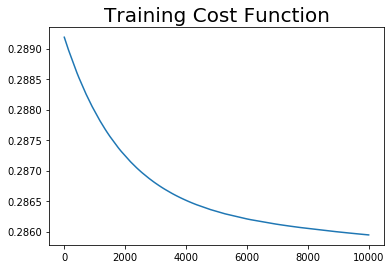

In [60]:
plt.plot(Training_loss)
plt.title('Training Cost Function', fontsize = 20)
plt.show()

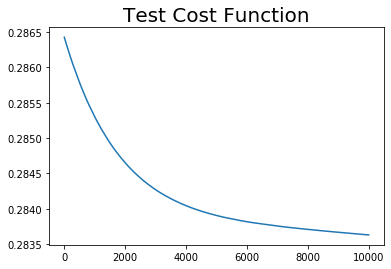

In [61]:
plt.plot(Test_loss)
plt.title('Test Cost Function', fontsize = 20)
plt.show()

In [62]:
#file_writer = tf.compat.v1.summary.FileWriter('/home/admin1/Tensorflow/graph/graph', sess.graph)

In [74]:
for i in range(93, 101):
    prediction_run = sess.run(prediction, feed_dict={x: X[i].reshape(1, 11)})
    print(' Predicted value:', prediction_run[0])

 Predicted value: 0
 Predicted value: 1
 Predicted value: 0
 Predicted value: 0
 Predicted value: 0
 Predicted value: 0
 Predicted value: 0
 Predicted value: 1
